# 30 % Missing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Create a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data=False):
    if missing_data:
        # Introduce 30% random missing data
        missing_percentage = 0.3
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data[cancer_type].iloc[missing_indices] = np.nan

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}{' with missing data' if missing_data else ''}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2, missing_data))

# Evaluate each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data=False)
    evaluate_cancer_type(cancer_type, missing_data=True)

# Create a DataFrame to store the evaluation metrics
df = pd.DataFrame(eval_metrics, columns=['Cancer Type', 'Model', 'RMSE', 'MAE', 'R-squared', 'Missing Data'])

# Display the DataFrame
print(df)


Predicting Bladder:
Predicting Bladder with missing data:
Predicting Brain:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Brain with missing data:
Predicting Breast:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Breast with missing data:
Predicting Bronchus_Lung:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bronchus_Lung with missing data:
Predicting Colorectal:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Colorectal with missing data:
Predicting Leukemia:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Leukemia with missing data:
Predicting Non_Hodgkins_Lymphoma:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma with missing data:
Predicting Stomach:
Predicting Stomach with missing data:
   Cancer Type                      Model      RMSE       MAE  R-squared  \
0      Bladder           LinearRegression  0.766227  0.721890  -1.873281   
1      Bladder                        SVR  0.926032  0.823642  -3.196768   
2      Bladder          AdaBoostRegressor  1.968872  1.672403 -17.971354   
3      Bladder      RandomForestRegressor  1.367264  1.173544  -8.148885   
4      Bladder  GradientBoostingRegressor  1.976652  1.693167 -18.121581   
..         ...                        ...       ...       ...        ...   
75     Stomach           LinearRegression  1.171834  1.021965  -1.603202   
76     Stomach                        SVR  1.182445  0.978892  -1.650559   
77     Stomach          AdaBoostRegressor  1.246277  0.992777  -1.944453   
78     Stomach      RandomForestRegressor  1.215959  0.923470  -1.802937   
79     Stomach  GradientBoostingRegressor  1.264317  1

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Load and preprocess the cancer dataset
# (Assuming you have already loaded and preprocessed the dataset)
# ...

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    for missing_data_flag in [False, True]:
        if missing_data_flag:
            # Introduce 30% random missing data
            missing_percentage = 0.3
            num_missing = int(len(data) * missing_percentage)
            missing_indices = np.random.choice(len(data), num_missing, replace=False)
            data_with_missing = data.copy()
            data_with_missing[cancer_type].iloc[missing_indices] = np.nan
            target = data_with_missing[cancer_type].values.reshape(-1, 1)
        else:
            target = data[cancer_type].values.reshape(-1, 1)

        # Handle missing values by imputing with the mean of the available values
        target = np.nan_to_num(target, nan=np.nanmean(target))

        # Normalize the target variable
        scaler = StandardScaler()
        target_scaled = scaler.fit_transform(target)

        # Split the data into training and testing sets
        train_size = 15  # Number of years for training
        test_size = 5  # Number of years for testing

        train_data = target_scaled[:train_size]
        test_data = target_scaled[train_size:train_size + test_size]

        # Split into input and output variables
        X_train = train_data[:-1]
        y_train = train_data[1:]
        X_test = test_data[:-1]
        y_test = test_data[1:]

        # Define the regression models to be evaluated
        models = [
            LinearRegression(),
            SVR(),
            AdaBoostRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor()
        ]

        # Train and evaluate each model
        for model in models:
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            model_name = model.__class__.__name__
            eval_metrics.append({
                'Cancer Type': cancer_type,
                'Missing Data': missing_data_flag,
                'Model': model_name,
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2
            })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(eval_metrics)

# Print the DataFrame
print(results_df)


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.624532  0.548727   
1      Bladder         False                        SVR  0.890177  0.815727   
2      Bladder         False          AdaBoostRegressor  1.646439  1.218818   
3      Bladder         False      RandomForestRegressor  1.262842  1.055424   
4      Bladder         False  GradientBoostingRegressor  1.669615  1.282408   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.517197  1.234064   
76     Stomach          True                        SVR  1.275003  0.877537   
77     Stomach          True          AdaBoostRegressor  1.398388  1.020133   
78     Stomach          True      RandomForestRegressor  1.234458  0.813836   
79     Stomach          True  GradientBoostingRegressor  1.259112  0.852394   

    R-squared  
0   -0.897683  
1   -2.855376  
2  

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan


In [3]:
results_df

,Cancer Type,Missing Data,Model,RMSE,MAE,R-squared
0,Bladder,False,LinearRegression,0.624532,0.548727,-0.897683
1,Bladder,False,SVR,0.890177,0.815727,-2.855376
2,Bladder,False,AdaBoostRegressor,1.646439,1.218818,-12.188787
3,Bladder,False,RandomForestRegressor,1.262842,1.055424,-6.759109
4,Bladder,False,GradientBoostingRegressor,1.669615,1.282408,-12.562717
...,...,...,...,...,...,...
75,Stomach,True,LinearRegression,1.517197,1.234064,-1.623914
76,Stomach,True,SVR,1.275003,0.877537,-0.853054
77,Stomach,True,AdaBoostRegressor,1.398388,1.020133,-1.229058
78,Stomach,True,RandomForestRegressor,1.234458,0.813836,-0.737075


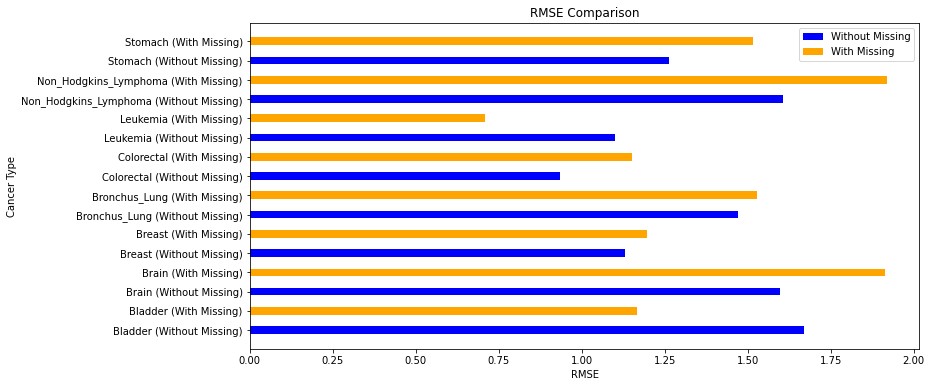

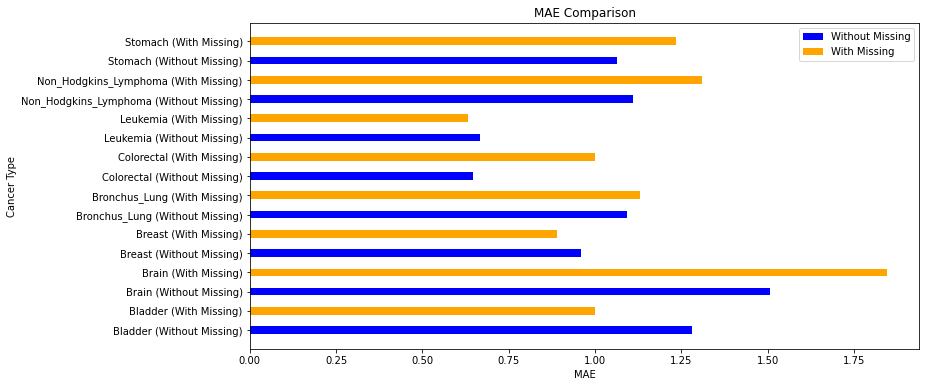

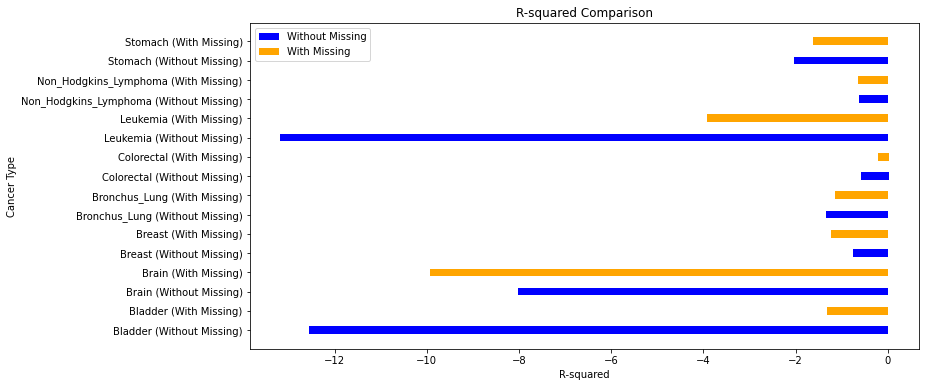

In [4]:
import matplotlib.pyplot as plt

# Assuming you have already computed 'results_df' from the previous code

# Group the data by 'Cancer Type', 'Model', and 'Missing Data'
grouped_data = results_df.groupby(['Cancer Type', 'Model', 'Missing Data']).mean().reset_index()

# Define a function to plot the metrics
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    for cancer_type in cancer_columns:
        without_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == False)][metric_name]
        with_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == True)][metric_name]

        plt.barh(cancer_type + ' (Without Missing)', without_missing, color='blue', height=0.4)
        plt.barh(cancer_type + ' (With Missing)', with_missing, color='orange', height=0.4)

    plt.xlabel(metric_name)
    plt.ylabel('Cancer Type')
    plt.title(f'{metric_name} Comparison')
    plt.legend(['Without Missing', 'With Missing'])
    plt.show()

# Plot RMSE, MAE, and R-squared comparisons
plot_metrics('RMSE')
plot_metrics('MAE')
plot_metrics('R-squared')


# 50 % Missing

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Create a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data=False):
    if missing_data:
        # Introduce 50% random missing data
        missing_percentage = 0.5
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data[cancer_type].iloc[missing_indices] = np.nan

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}{' with missing data' if missing_data else ''}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2, missing_data))

# Evaluate each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data=False)
    evaluate_cancer_type(cancer_type, missing_data=True)

# Create a DataFrame to store the evaluation metrics
df = pd.DataFrame(eval_metrics, columns=['Cancer Type', 'Model', 'RMSE', 'MAE', 'R-squared', 'Missing Data'])

# Display the DataFrame
print(df)


Predicting Bladder:
Predicting Bladder with missing data:
Predicting Brain:
Predicting Brain with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Breast:
Predicting Breast with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bronchus_Lung:
Predicting Bronchus_Lung with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Colorectal:
Predicting Colorectal with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Leukemia:
Predicting Leukemia with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma:
Predicting Non_Hodgkins_Lymphoma with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Stomach:
Predicting Stomach with missing data:
   Cancer Type                      Model      RMSE       MAE  R-squared  \
0      Bladder           LinearRegression  0.766227  0.721890  -1.873281   
1      Bladder                        SVR  0.926032  0.823642  -3.196768   
2      Bladder          AdaBoostRegressor  1.968872  1.672403 -17.971354   
3      Bladder      RandomForestRegressor  1.367264  1.173544  -8.148885   
4      Bladder  GradientBoostingRegressor  1.976652  1.693167 -18.121581   
..         ...                        ...       ...       ...        ...   
75     Stomach           LinearRegression  1.817691  1.602548  -3.349515   
76     Stomach                        SVR  1.691467  1.480352  -2.766414   
77     Stomach          AdaBoostRegressor  1.962832  1.763092  -4.071861   
78     Stomach      RandomForestRegressor  1.817093  1.640724  -3.346656   
79     Stomach  GradientBoostingRegressor  1.962824  1.763088  -4.071817   

    Missing Data  
0         

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3934951011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Load and preprocess the cancer dataset
# (Assuming you have already loaded and preprocessed the dataset)
# ...

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    for missing_data_flag in [False, True]:
        if missing_data_flag:
            # Introduce 30% random missing data
            missing_percentage = 0.3
            num_missing = int(len(data) * missing_percentage)
            missing_indices = np.random.choice(len(data), num_missing, replace=False)
            data_with_missing = data.copy()
            data_with_missing[cancer_type].iloc[missing_indices] = np.nan
            target = data_with_missing[cancer_type].values.reshape(-1, 1)
        else:
            target = data[cancer_type].values.reshape(-1, 1)

        # Handle missing values by imputing with the mean of the available values
        target = np.nan_to_num(target, nan=np.nanmean(target))

        # Normalize the target variable
        scaler = StandardScaler()
        target_scaled = scaler.fit_transform(target)

        # Split the data into training and testing sets
        train_size = 15  # Number of years for training
        test_size = 5  # Number of years for testing

        train_data = target_scaled[:train_size]
        test_data = target_scaled[train_size:train_size + test_size]

        # Split into input and output variables
        X_train = train_data[:-1]
        y_train = train_data[1:]
        X_test = test_data[:-1]
        y_test = test_data[1:]

        # Define the regression models to be evaluated
        models = [
            LinearRegression(),
            SVR(),
            AdaBoostRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor()
        ]

        # Train and evaluate each model
        for model in models:
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            model_name = model.__class__.__name__
            eval_metrics.append({
                'Cancer Type': cancer_type,
                'Missing Data': missing_data_flag,
                'Model': model_name,
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2
            })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(eval_metrics)

# Print the DataFrame
print(results_df)


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.625142  0.566685   
1      Bladder         False                        SVR  0.878715  0.818338   
2      Bladder         False          AdaBoostRegressor  1.893102  1.549549   
3      Bladder         False      RandomForestRegressor  1.448219  1.224794   
4      Bladder         False  GradientBoostingRegressor  1.851208  1.454041   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  0.941526  0.622868   
76     Stomach          True                        SVR  0.974099  0.544799   
77     Stomach          True          AdaBoostRegressor  1.905261  1.143209   
78     Stomach          True      RandomForestRegressor  1.474919  0.785549   
79     Stomach          True  GradientBoostingRegressor  1.886638  1.014386   

    R-squared  
0   -1.085608  
1   -3.120711  
2  

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan


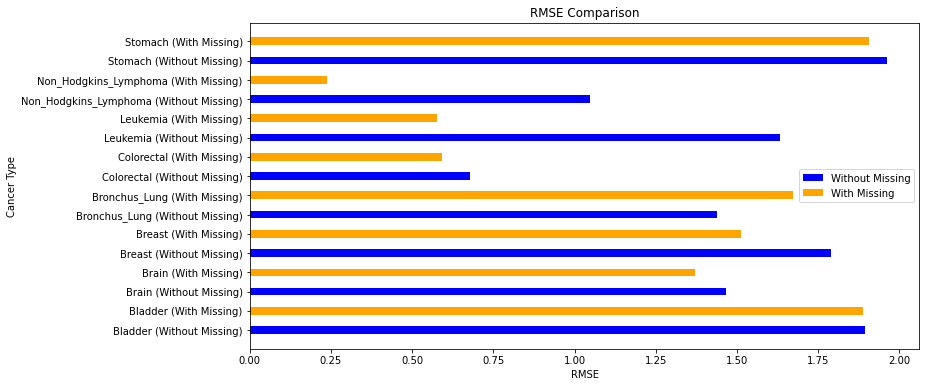

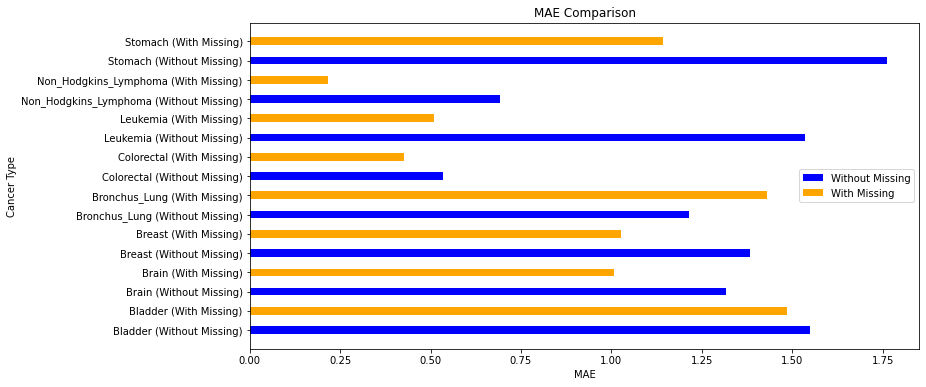

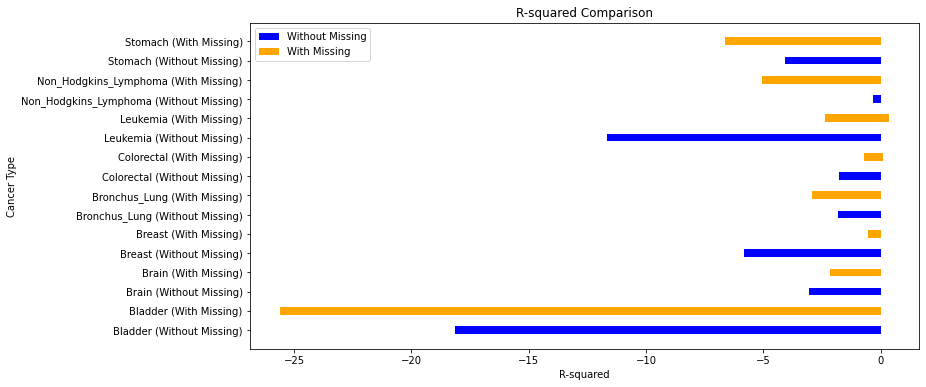

In [7]:
import matplotlib.pyplot as plt

# Assuming you have already computed 'results_df' from the previous code

# Group the data by 'Cancer Type', 'Model', and 'Missing Data'
grouped_data = results_df.groupby(['Cancer Type', 'Model', 'Missing Data']).mean().reset_index()

# Define a function to plot the metrics
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    for cancer_type in cancer_columns:
        without_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == False)][metric_name]
        with_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == True)][metric_name]

        plt.barh(cancer_type + ' (Without Missing)', without_missing, color='blue', height=0.4)
        plt.barh(cancer_type + ' (With Missing)', with_missing, color='orange', height=0.4)

    plt.xlabel(metric_name)
    plt.ylabel('Cancer Type')
    plt.title(f'{metric_name} Comparison')
    plt.legend(['Without Missing', 'With Missing'])
    plt.show()

# Plot RMSE, MAE, and R-squared comparisons
plot_metrics('RMSE')
plot_metrics('MAE')
plot_metrics('R-squared')


In [8]:
results_df

,Cancer Type,Missing Data,Model,RMSE,MAE,R-squared
0,Bladder,False,LinearRegression,0.625142,0.566685,-1.085608
1,Bladder,False,SVR,0.878715,0.818338,-3.120711
2,Bladder,False,AdaBoostRegressor,1.893102,1.549549,-18.125983
3,Bladder,False,RandomForestRegressor,1.448219,1.224794,-10.192936
4,Bladder,False,GradientBoostingRegressor,1.851208,1.454041,-17.288849
...,...,...,...,...,...,...
75,Stomach,True,LinearRegression,0.941526,0.622868,-0.860626
76,Stomach,True,SVR,0.974099,0.544799,-0.991590
77,Stomach,True,AdaBoostRegressor,1.905261,1.143209,-6.619086
78,Stomach,True,RandomForestRegressor,1.474919,0.785549,-3.565944


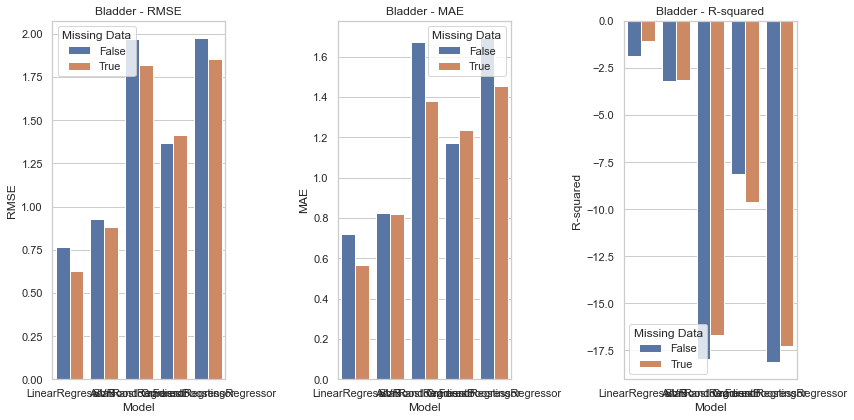

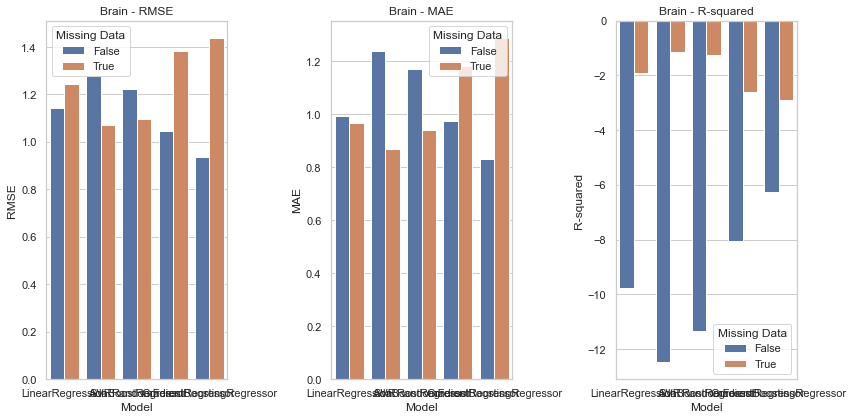

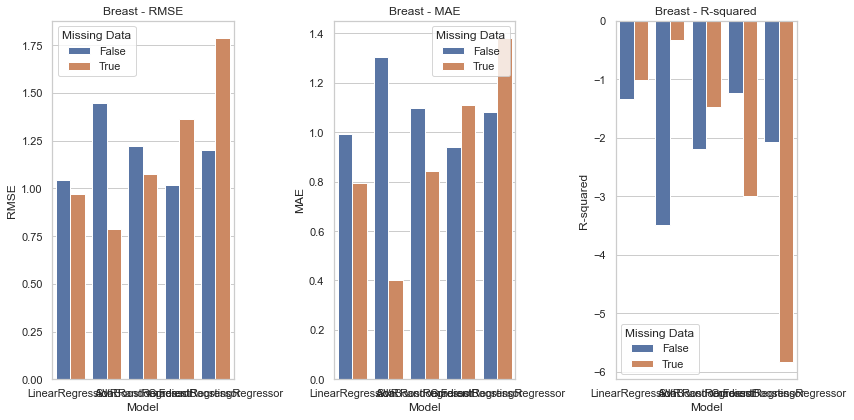

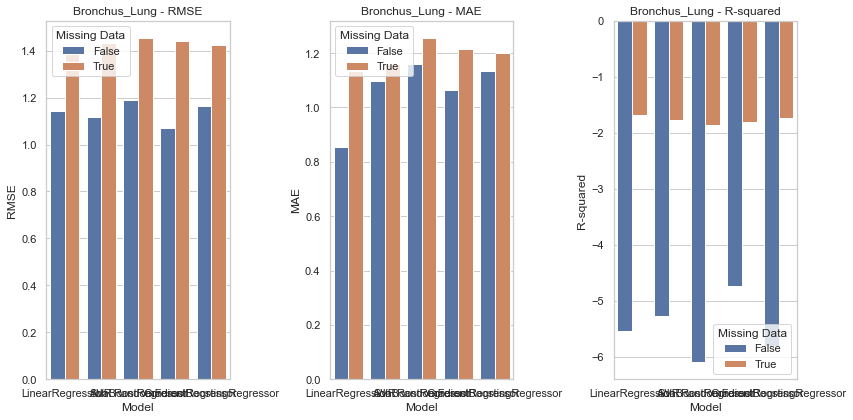

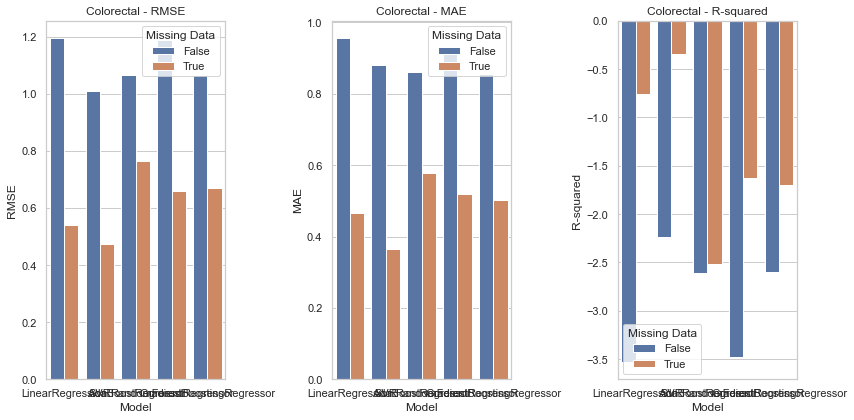

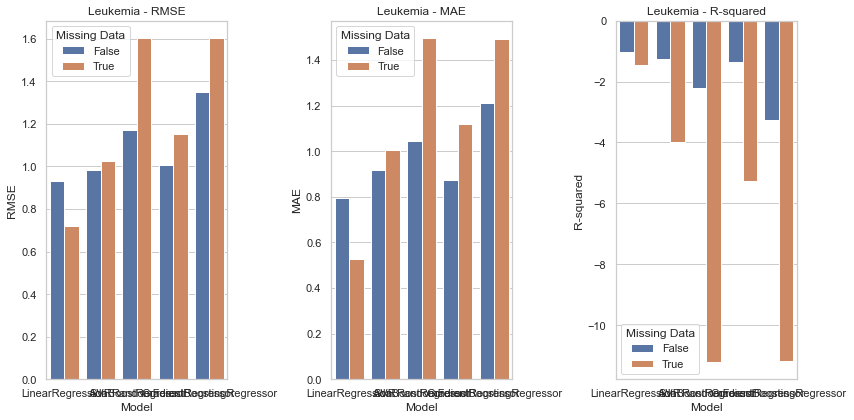

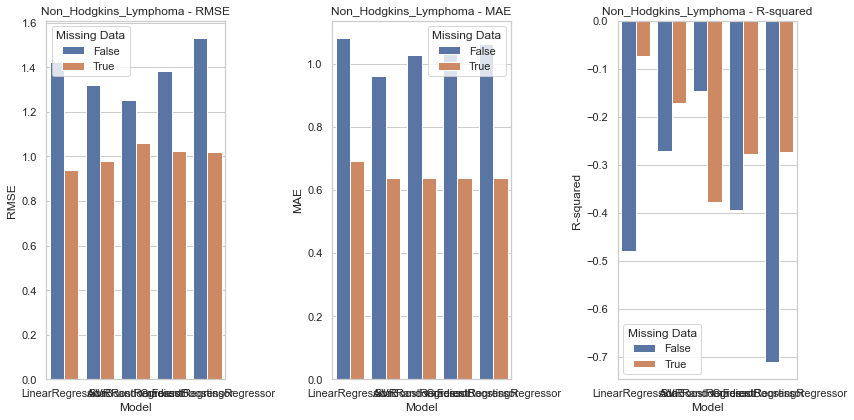

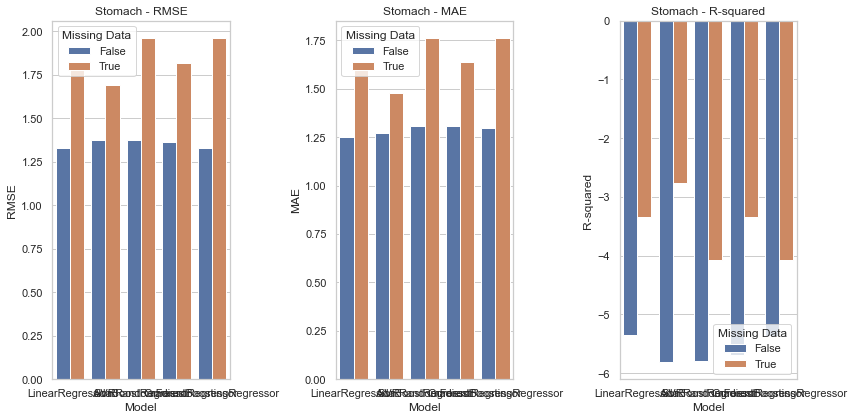

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the evaluation metrics for each cancer type with and without missing data
for cancer_type in cancer_columns:
    # Filter data for the specific cancer type
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Plot MAE
    plt.subplot(1, 3, 2)
    sns.barplot(x='Model', y='MAE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - MAE')

    # Plot R-squared
    plt.subplot(1, 3, 3)
    sns.barplot(x='Model', y='R-squared', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - R-squared')

    # Adjust layout
    plt.tight_layout()
    plt.show()


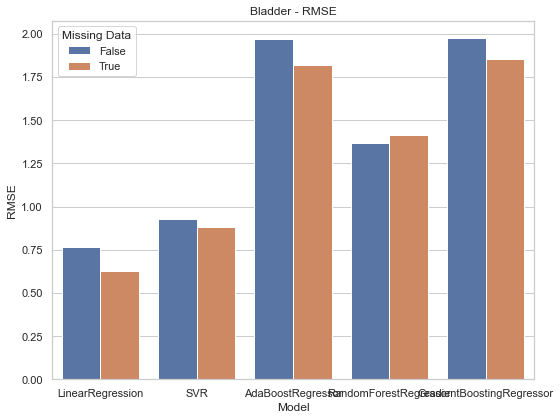

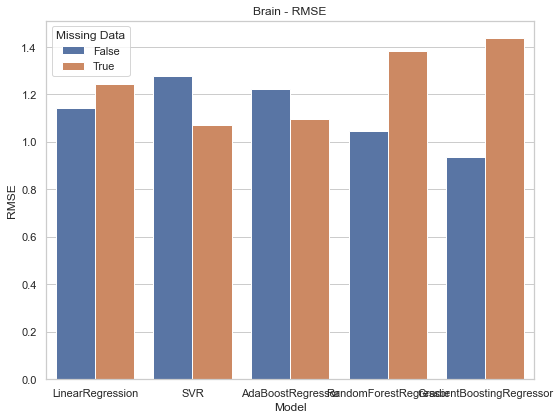

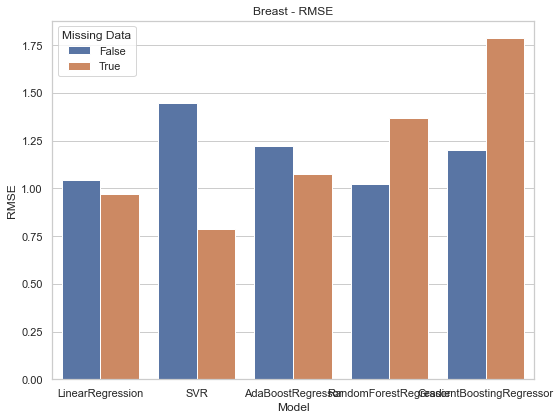

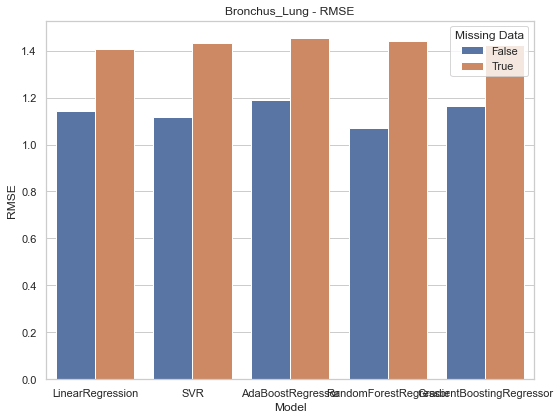

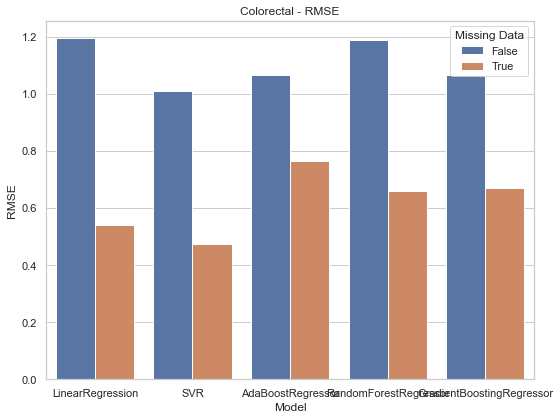

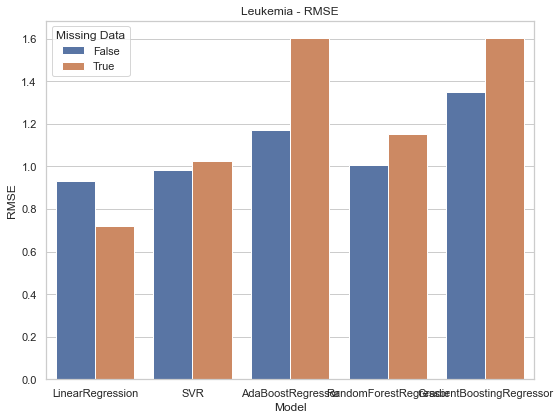

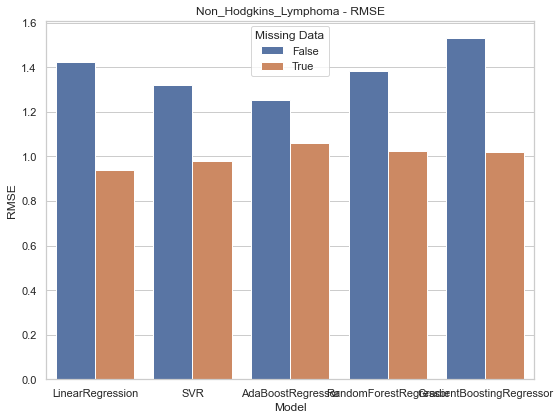

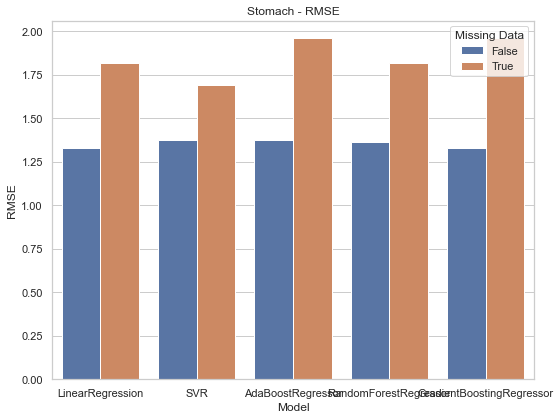

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    # Filter data for the specific cancer type
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Adjust layout
    plt.tight_layout()
    plt.show()


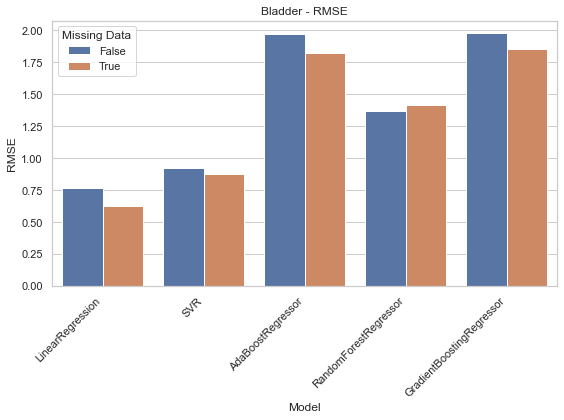

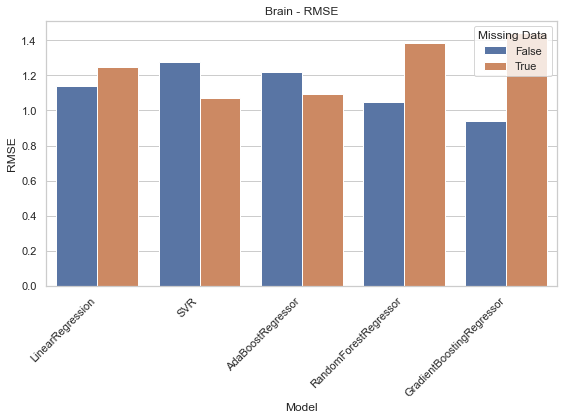

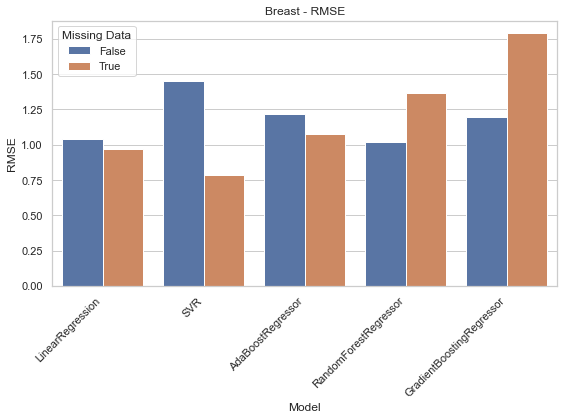

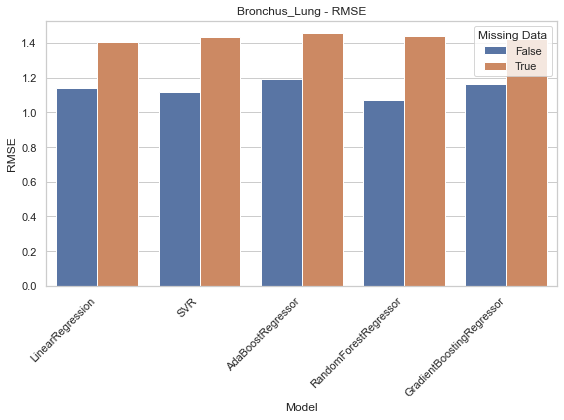

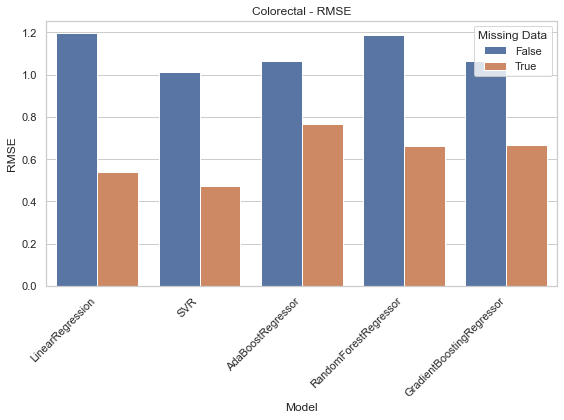

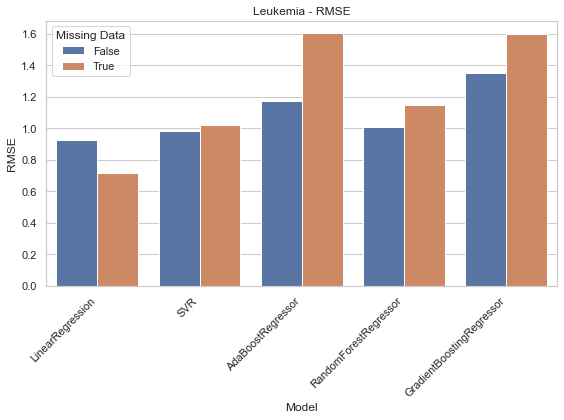

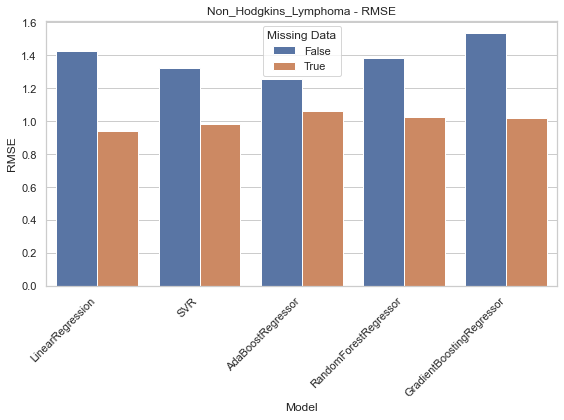

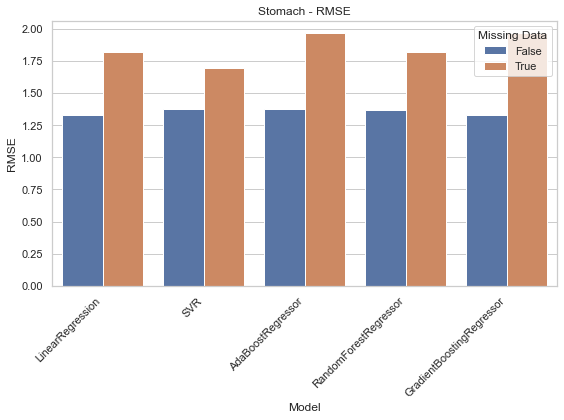

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    # Filter data for the specific cancer type
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


Predicting Bladder:
Predicting Bladder with missing data:
Predicting Brain:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Brain with missing data:
Predicting Breast:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Breast with missing data:
Predicting Bronchus_Lung:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bronchus_Lung with missing data:
Predicting Colorectal:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Colorectal with missing data:
Predicting Leukemia:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Leukemia with missing data:
Predicting Non_Hodgkins_Lymphoma:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma with missing data:
Predicting Stomach:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Stomach with missing data:
   Cancer Type                      Model      RMSE       MAE  R-squared  \
0      Bladder           LinearRegression  0.766227  0.721890  -1.873281   
1      Bladder                        SVR  0.926032  0.823642  -3.196768   
2      Bladder          AdaBoostRegressor  1.968872  1.672403 -17.971354   
3      Bladder      RandomForestRegressor  1.367264  1.173544  -8.148885   
4      Bladder  GradientBoostingRegressor  1.976652  1.693167 -18.121581   
..         ...                        ...       ...       ...        ...   
75     Stomach           LinearRegression  1.171834  1.021965  -1.603202   
76     Stomach                        SVR  1.182445  0.978892  -1.650559   
77     Stomach          AdaBoostRegressor  1.246277  0.992777  -1.944453   
78     Stomach      RandomForestRegressor  1.215959  0.923470  -1.802937   
79     Stomach  GradientBoostingRegressor  1.264317  1.064418  -2.030314   

    Missing Data  
0          False  
1          

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/3084148237.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.624532  0.548727   
1      Bladder         False                        SVR  0.890177  0.815727   
2      Bladder         False          AdaBoostRegressor  1.646439  1.218818   
3      Bladder         False      RandomForestRegressor  1.262842  1.055424   
4      Bladder         False  GradientBoostingRegressor  1.669615  1.282408   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.517197  1.234064   
76     Stomach          True                        SVR  1.275003  0.877537   
77     Stomach          True          AdaBoostRegressor  1.398388  1.020133   
78     Stomach          True      RandomForestRegressor  1.234458  0.813836   
79     Stomach          True  GradientBoostingRegressor  1.259112  0.852394   

    R-squared  
0   -0.897683  
1   -2.855376  
2  

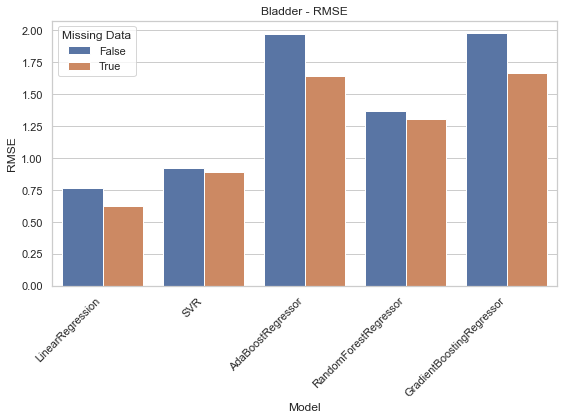

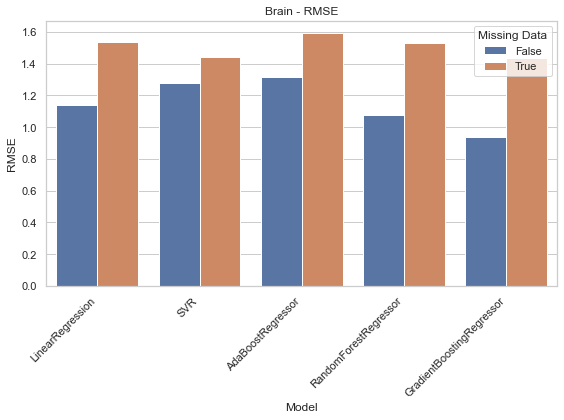

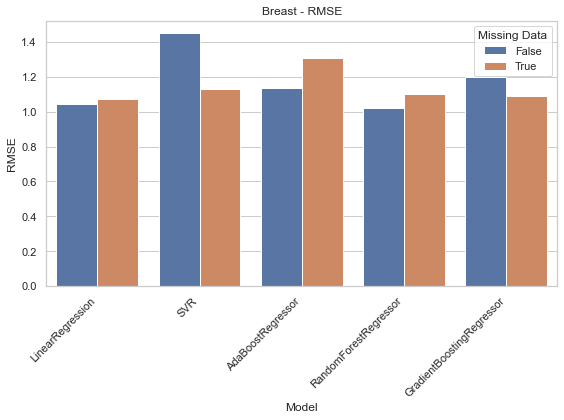

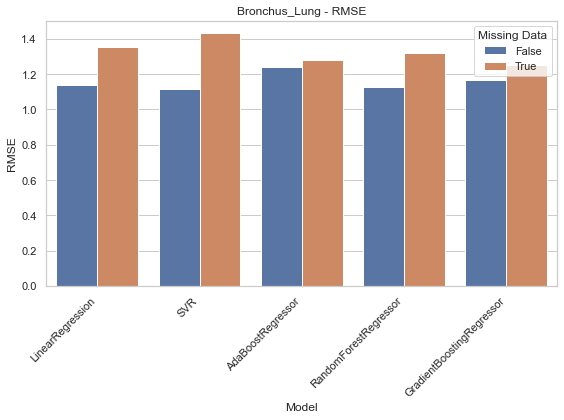

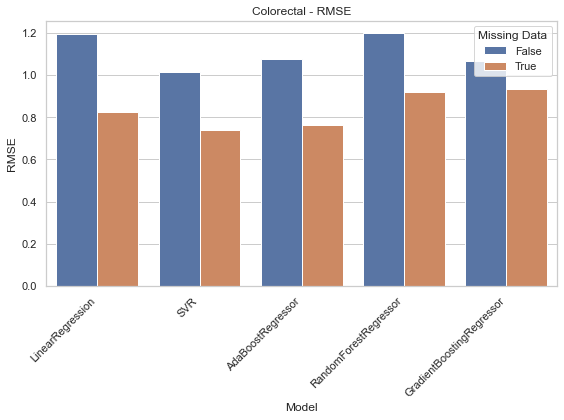

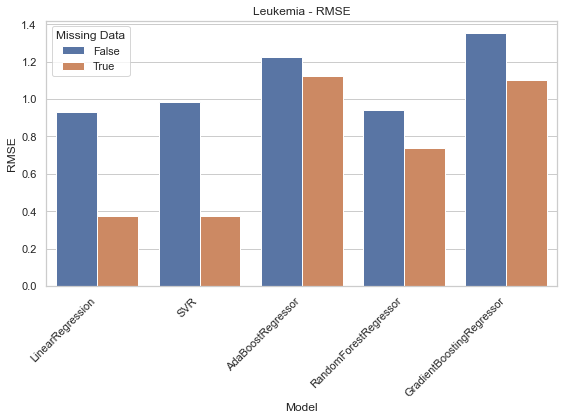

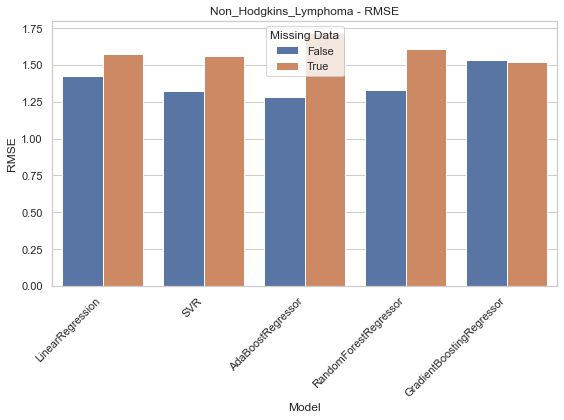

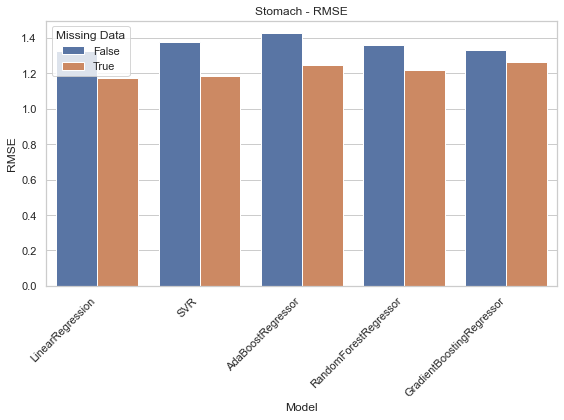

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Create a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data=False):
    if missing_data:
        # Introduce 30% random missing data
        missing_percentage = 0.3
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data[cancer_type].iloc[missing_indices] = np.nan

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}{' with missing data' if missing_data else ''}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2, missing_data))

# Evaluate each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data=False)
    evaluate_cancer_type(cancer_type, missing_data=True)

# Create a DataFrame to store the evaluation metrics
df = pd.DataFrame(eval_metrics, columns=['Cancer Type', 'Model', 'RMSE', 'MAE', 'R-squared', 'Missing Data'])

# Display the DataFrame
print(df)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Load and preprocess the cancer dataset
# (Assuming you have already loaded and preprocessed the dataset)
# ...

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    for missing_data_flag in [False, True]:
        if missing_data_flag:
            # Introduce 30% random missing data
            missing_percentage = 0.3
            num_missing = int(len(data) * missing_percentage)
            missing_indices = np.random.choice(len(data), num_missing, replace=False)
            data_with_missing = data.copy()
            data_with_missing[cancer_type].iloc[missing_indices] = np.nan
            target = data_with_missing[cancer_type].values.reshape(-1, 1)
        else:
            target = data[cancer_type].values.reshape(-1, 1)

        # Handle missing values by imputing with the mean of the available values
        target = np.nan_to_num(target, nan=np.nanmean(target))

        # Normalize the target variable
        scaler = StandardScaler()
        target_scaled = scaler.fit_transform(target)

        # Split the data into training and testing sets
        train_size = 15  # Number of years for training
        test_size = 5  # Number of years for testing

        train_data = target_scaled[:train_size]
        test_data = target_scaled[train_size:train_size + test_size]

        # Split into input and output variables
        X_train = train_data[:-1]
        y_train = train_data[1:]
        X_test = test_data[:-1]
        y_test = test_data[1:]

        # Define the regression models to be evaluated
        models = [
            LinearRegression(),
            SVR(),
            AdaBoostRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor()
        ]

        # Train and evaluate each model
        for model in models:
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            model_name = model.__class__.__name__
            eval_metrics.append({
                'Cancer Type': cancer_type,
                'Missing Data': missing_data_flag,
                'Model': model_name,
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2
            })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(eval_metrics)

# Print the DataFrame
print(results_df)



import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    # Filter data for the specific cancer type
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


Predicting Bladder:
Predicting Bladder with missing data:
Predicting Brain:
Predicting Brain with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Breast:
Predicting Breast with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bronchus_Lung:
Predicting Bronchus_Lung with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Colorectal:
Predicting Colorectal with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Leukemia:
Predicting Leukemia with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma with missing data:
Predicting Stomach:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Stomach with missing data:
   Cancer Type                      Model      RMSE       MAE  R-squared  \
0      Bladder           LinearRegression  0.766227  0.721890  -1.873281   
1      Bladder                        SVR  0.926032  0.823642  -3.196768   
2      Bladder          AdaBoostRegressor  1.968872  1.672403 -17.971354   
3      Bladder      RandomForestRegressor  1.367264  1.173544  -8.148885   
4      Bladder  GradientBoostingRegressor  1.976652  1.693167 -18.121581   
..         ...                        ...       ...       ...        ...   
75     Stomach           LinearRegression  1.817691  1.602548  -3.349515   
76     Stomach                        SVR  1.691467  1.480352  -2.766414   
77     Stomach          AdaBoostRegressor  1.962832  1.763092  -4.071861   
78     Stomach      RandomForestRegressor  1.817093  1.640724  -3.346656   
79     Stomach  GradientBoostingRegressor  1.962824  1.763088  -4.071817   

    Missing Data  
0          False  
1          

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/2225287809.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.625142  0.566685   
1      Bladder         False                        SVR  0.878715  0.818338   
2      Bladder         False          AdaBoostRegressor  1.893102  1.549549   
3      Bladder         False      RandomForestRegressor  1.448219  1.224794   
4      Bladder         False  GradientBoostingRegressor  1.851208  1.454041   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.733735  0.978444   
76     Stomach          True                        SVR  1.703367  0.918128   
77     Stomach          True          AdaBoostRegressor  1.656765  0.848429   
78     Stomach          True      RandomForestRegressor  1.748704  0.930859   
79     Stomach          True  GradientBoostingRegressor  1.743950  0.886996   

    R-squared  
0   -1.085608  
1   -3.120711  
2  

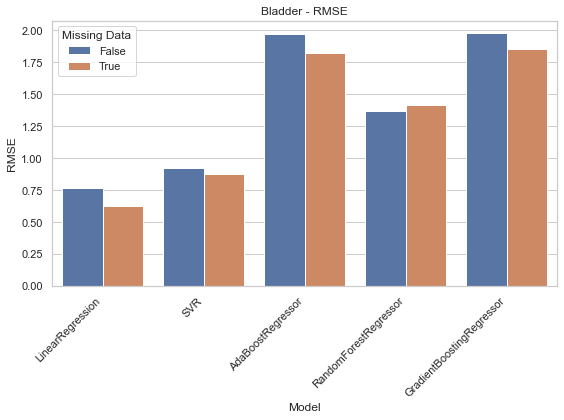

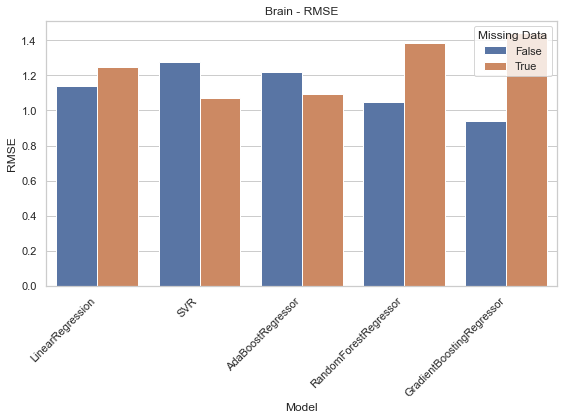

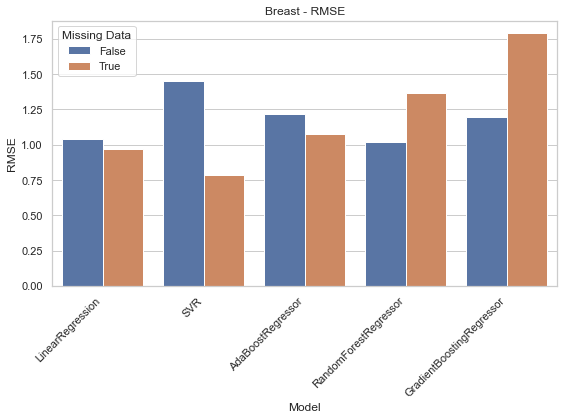

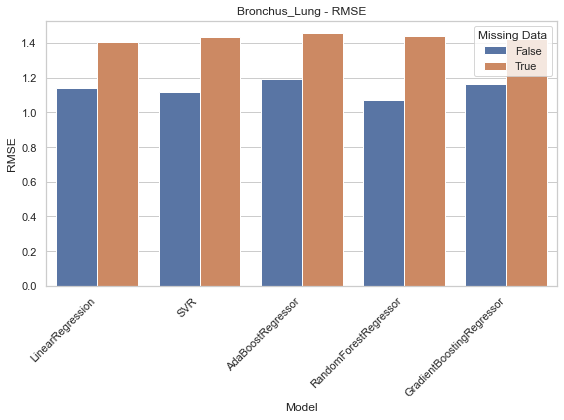

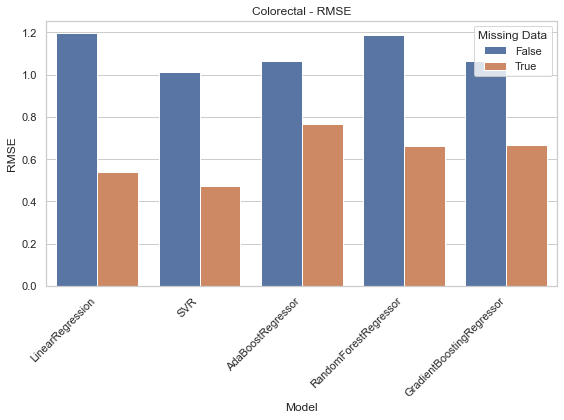

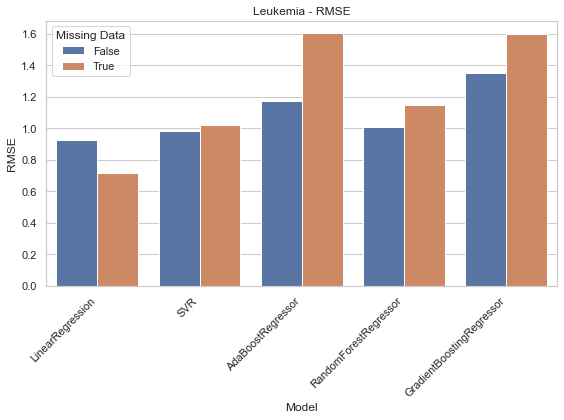

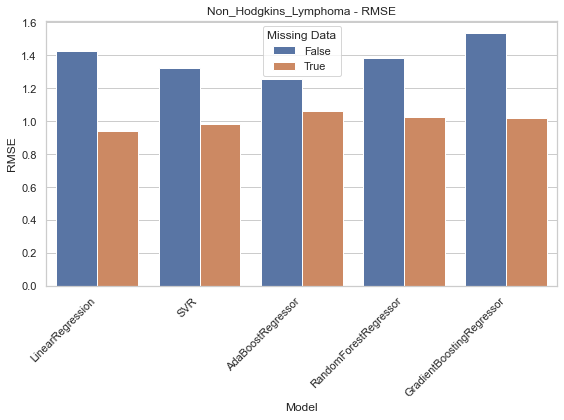

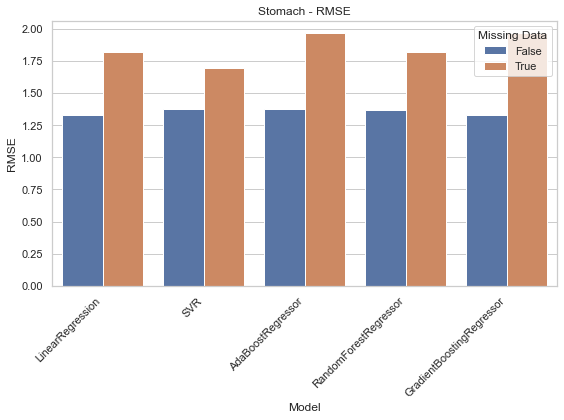

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Create a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data=False):
    if missing_data:
        # Introduce 30% random missing data
        missing_percentage = 0.5
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data[cancer_type].iloc[missing_indices] = np.nan

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}{' with missing data' if missing_data else ''}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2, missing_data))

# Evaluate each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data=False)
    evaluate_cancer_type(cancer_type, missing_data=True)

# Create a DataFrame to store the evaluation metrics
df = pd.DataFrame(eval_metrics, columns=['Cancer Type', 'Model', 'RMSE', 'MAE', 'R-squared', 'Missing Data'])

# Display the DataFrame
print(df)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Load and preprocess the cancer dataset
# (Assuming you have already loaded and preprocessed the dataset)
# ...

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    for missing_data_flag in [False, True]:
        if missing_data_flag:
            # Introduce 30% random missing data
            missing_percentage = 0.5
            num_missing = int(len(data) * missing_percentage)
            missing_indices = np.random.choice(len(data), num_missing, replace=False)
            data_with_missing = data.copy()
            data_with_missing[cancer_type].iloc[missing_indices] = np.nan
            target = data_with_missing[cancer_type].values.reshape(-1, 1)
        else:
            target = data[cancer_type].values.reshape(-1, 1)

        # Handle missing values by imputing with the mean of the available values
        target = np.nan_to_num(target, nan=np.nanmean(target))

        # Normalize the target variable
        scaler = StandardScaler()
        target_scaled = scaler.fit_transform(target)

        # Split the data into training and testing sets
        train_size = 15  # Number of years for training
        test_size = 5  # Number of years for testing

        train_data = target_scaled[:train_size]
        test_data = target_scaled[train_size:train_size + test_size]

        # Split into input and output variables
        X_train = train_data[:-1]
        y_train = train_data[1:]
        X_test = test_data[:-1]
        y_test = test_data[1:]

        # Define the regression models to be evaluated
        models = [
            LinearRegression(),
            SVR(),
            AdaBoostRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor()
        ]

        # Train and evaluate each model
        for model in models:
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            model_name = model.__class__.__name__
            eval_metrics.append({
                'Cancer Type': cancer_type,
                'Missing Data': missing_data_flag,
                'Model': model_name,
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2
            })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(eval_metrics)

# Print the DataFrame
print(results_df)



import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    # Filter data for the specific cancer type
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Create a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data=False):
    if missing_data:
        # Introduce 70% random missing data
        missing_percentage = 0.7
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data[cancer_type].iloc[missing_indices] = np.nan

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}{' with missing data' if missing_data else ''}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2, missing_data))

# Evaluate each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data=False)
    evaluate_cancer_type(cancer_type, missing_data=True)

# Create a DataFrame to store the evaluation metrics
df = pd.DataFrame(eval_metrics, columns=['Cancer Type', 'Model', 'RMSE', 'MAE', 'R-squared', 'Missing Data'])

# Display the DataFrame
print(df)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Load and preprocess the cancer dataset
# (Assuming you have already loaded and preprocessed the dataset)
# ...

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    for missing_data_flag in [False, True]:
        if missing_data_flag:
            # Introduce 30% random missing data
            missing_percentage = 0.7
            num_missing = int(len(data) * missing_percentage)
            missing_indices = np.random.choice(len(data), num_missing, replace=False)
            data_with_missing = data.copy()
            data_with_missing[cancer_type].iloc[missing_indices] = np.nan
            target = data_with_missing[cancer_type].values.reshape(-1, 1)
        else:
            target = data[cancer_type].values.reshape(-1, 1)

        # Handle missing values by imputing with the mean of the available values
        target = np.nan_to_num(target, nan=np.nanmean(target))

        # Normalize the target variable
        scaler = StandardScaler()
        target_scaled = scaler.fit_transform(target)

        # Split the data into training and testing sets
        train_size = 15  # Number of years for training
        test_size = 5  # Number of years for testing

        train_data = target_scaled[:train_size]
        test_data = target_scaled[train_size:train_size + test_size]

        # Split into input and output variables
        X_train = train_data[:-1]
        y_train = train_data[1:]
        X_test = test_data[:-1]
        y_test = test_data[1:]

        # Define the regression models to be evaluated
        models = [
            LinearRegression(),
            SVR(),
            AdaBoostRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor()
        ]

        # Train and evaluate each model
        for model in models:
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            model_name = model.__class__.__name__
            eval_metrics.append({
                'Cancer Type': cancer_type,
                'Missing Data': missing_data_flag,
                'Model': model_name,
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2
            })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(eval_metrics)

# Print the DataFrame
print(results_df)



import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    # Filter data for the specific cancer type
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


Predicting Bladder:
Predicting Bladder with missing data:
Predicting Brain:
Predicting Brain with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Breast:
Predicting Breast with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bronchus_Lung:
Predicting Bronchus_Lung with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Colorectal:
Predicting Colorectal with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Leukemia:
Predicting Leukemia with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma:
Predicting Non_Hodgkins_Lymphoma with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Stomach:
Predicting Stomach with missing data:


C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


   Cancer Type                      Model      RMSE       MAE  R-squared  \
0      Bladder           LinearRegression  0.766227  0.721890  -1.873281   
1      Bladder                        SVR  0.926032  0.823642  -3.196768   
2      Bladder          AdaBoostRegressor  1.968872  1.672403 -17.971354   
3      Bladder      RandomForestRegressor  1.367264  1.173544  -8.148885   
4      Bladder  GradientBoostingRegressor  1.976652  1.693167 -18.121581   
..         ...                        ...       ...       ...        ...   
75     Stomach           LinearRegression  1.907767  1.538115  -2.270895   
76     Stomach                        SVR  1.562733  1.153004  -1.194753   
77     Stomach          AdaBoostRegressor  1.930293  1.662091  -2.348595   
78     Stomach      RandomForestRegressor  1.771489  1.472643  -1.820286   
79     Stomach  GradientBoostingRegressor  1.743472  1.460754  -1.731782   

    Missing Data  
0          False  
1          False  
2          False  
3          

C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_37088/4171827644.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.766227  0.721890   
1      Bladder         False                        SVR  0.926032  0.823642   
2      Bladder         False          AdaBoostRegressor  1.968872  1.672403   
3      Bladder         False      RandomForestRegressor  1.367264  1.173544   
4      Bladder         False  GradientBoostingRegressor  1.976652  1.693167   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.907767  1.538115   
76     Stomach          True                        SVR  1.562733  1.153004   
77     Stomach          True          AdaBoostRegressor  1.930293  1.662091   
78     Stomach          True      RandomForestRegressor  1.771489  1.472643   
79     Stomach          True  GradientBoostingRegressor  1.743472  1.460754   

    R-squared  
0   -1.873281  
1   -3.196768  
2  

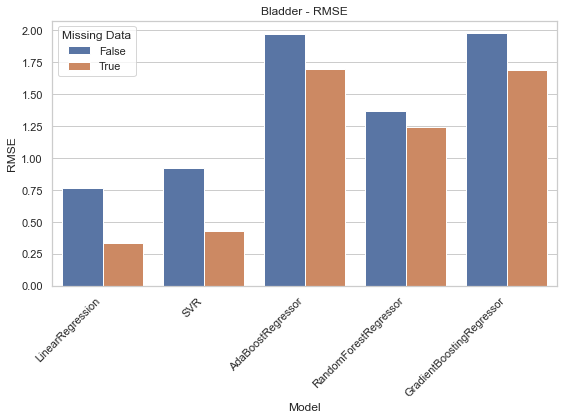

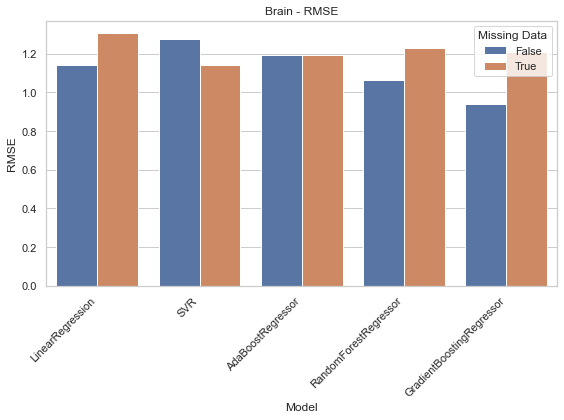

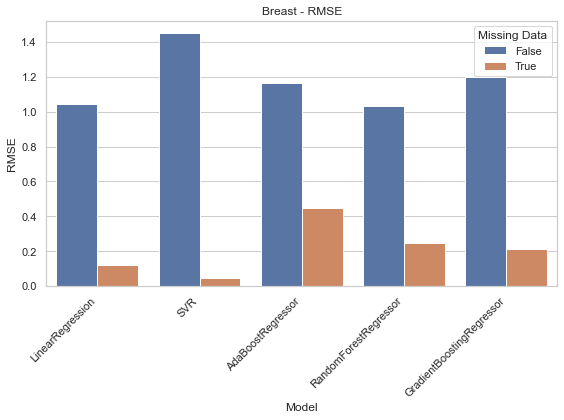

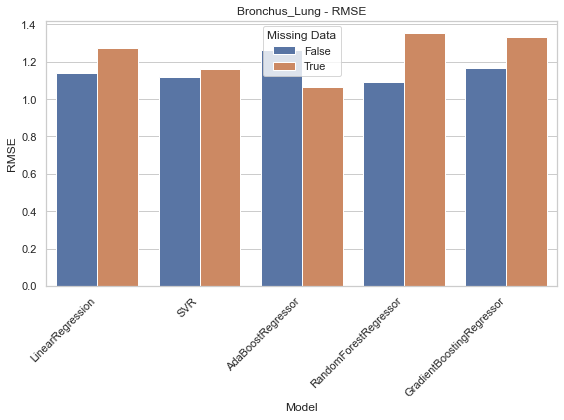

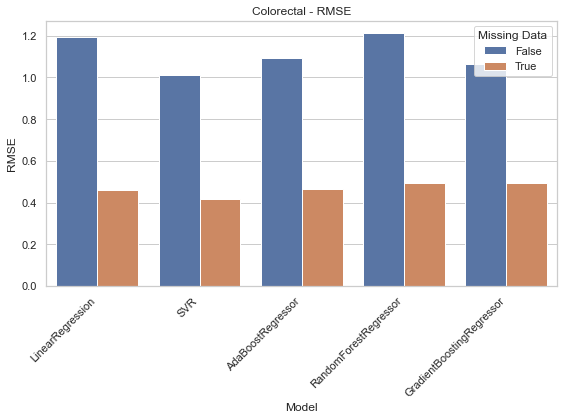

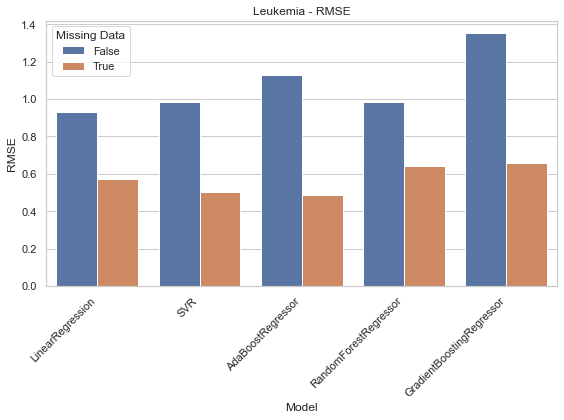

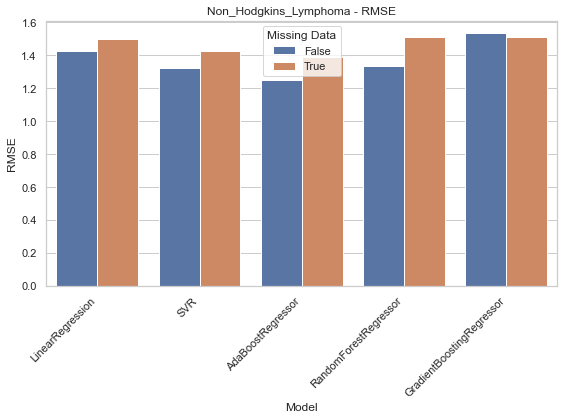

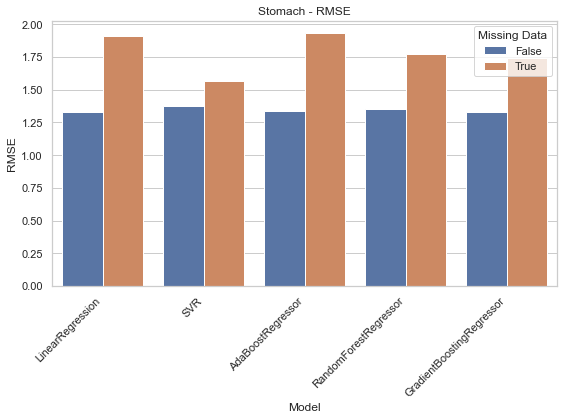

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data_flag=False):
    if missing_data_flag:
        # Introduce 30% random missing data
        missing_percentage = 0.7
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data_with_missing = data.copy()
        data_with_missing[cancer_type].iloc[missing_indices] = np.nan
        target = data_with_missing[cancer_type].values.reshape(-1, 1)
    else:
        target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append({
            'Cancer Type': cancer_type,
            'Missing Data': missing_data_flag,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data_flag=False)
    evaluate_cancer_type(cancer_type, missing_data_flag=True)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(eval_metrics)

# Display the DataFrame
print(df)

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


# FROM HERE

# 10%

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.766227  0.721890   
1      Bladder         False                        SVR  0.926032  0.823642   
2      Bladder         False          AdaBoostRegressor  1.968872  1.672403   
3      Bladder         False      RandomForestRegressor  1.367264  1.173544   
4      Bladder         False  GradientBoostingRegressor  1.976652  1.693167   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.602019  1.520299   
76     Stomach          True                        SVR  1.564313  1.471376   
77     Stomach          True          AdaBoostRegressor  1.837978  1.778030   
78     Stomach          True      RandomForestRegressor  1.675872  1.616780   
79     Stomach          True  GradientBoostingRegressor  1.749361  1.695053   

    R-squared  
0   -1.873281  
1   -3.196768  
2  

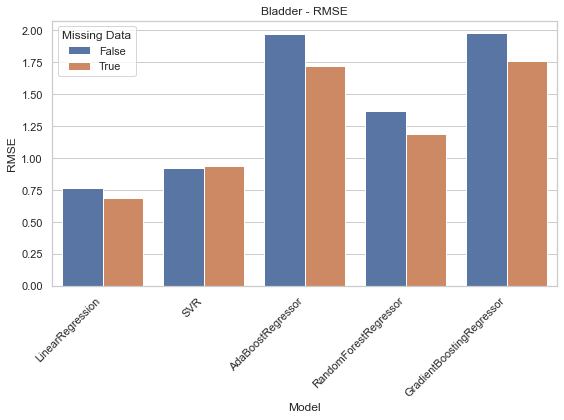

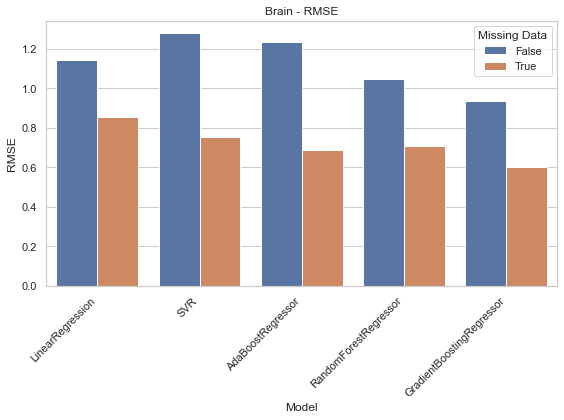

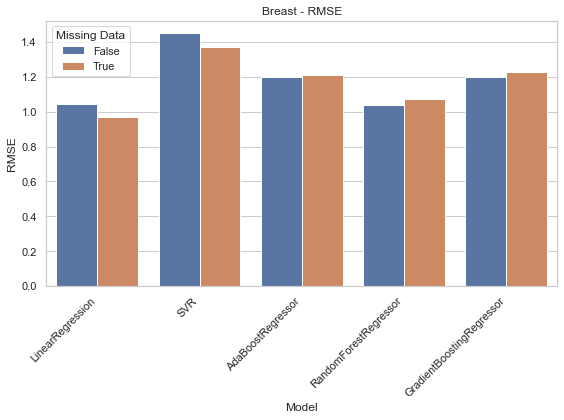

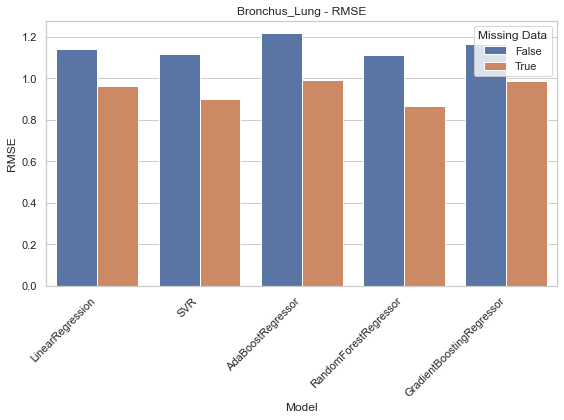

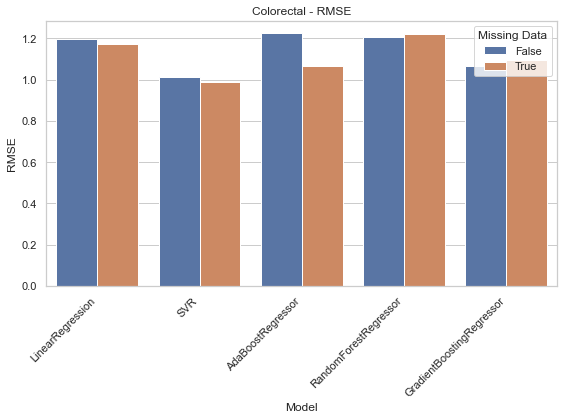

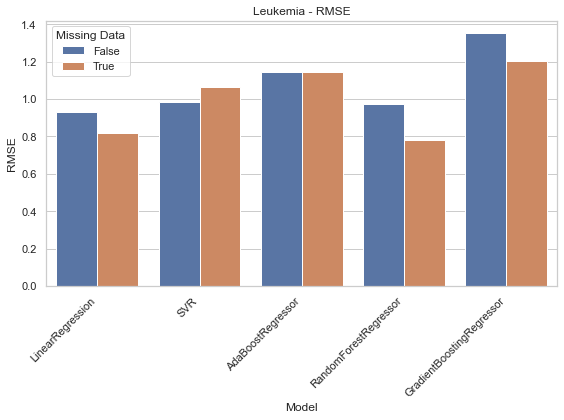

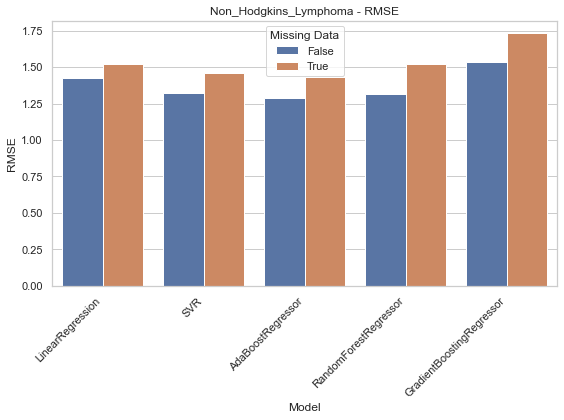

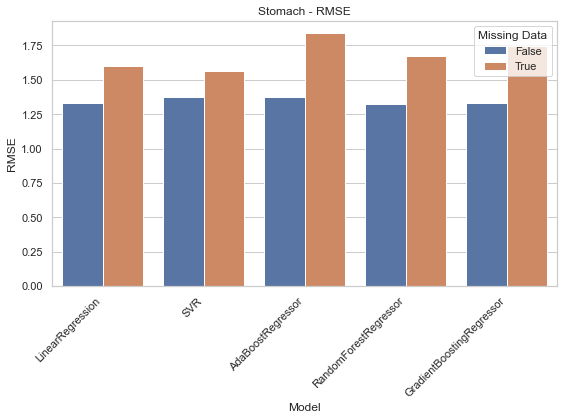

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data_flag=False):
    if missing_data_flag:
        # Introduce 10% random missing data
        missing_percentage = 0.1
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data_with_missing = data.copy()
        data_with_missing[cancer_type].iloc[missing_indices] = np.nan
        target = data_with_missing[cancer_type].values.reshape(-1, 1)
    else:
        target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append({
            'Cancer Type': cancer_type,
            'Missing Data': missing_data_flag,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data_flag=False)
    evaluate_cancer_type(cancer_type, missing_data_flag=True)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(eval_metrics)

# Display the DataFrame
print(df)

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


# %30

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.766227  0.721890   
1      Bladder         False                        SVR  0.926032  0.823642   
2      Bladder         False          AdaBoostRegressor  1.968872  1.672403   
3      Bladder         False      RandomForestRegressor  1.367264  1.173544   
4      Bladder         False  GradientBoostingRegressor  1.976652  1.693167   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.171834  1.021965   
76     Stomach          True                        SVR  1.182445  0.978892   
77     Stomach          True          AdaBoostRegressor  1.246277  0.992777   
78     Stomach          True      RandomForestRegressor  1.215959  0.923470   
79     Stomach          True  GradientBoostingRegressor  1.264317  1.064418   

    R-squared  
0   -1.873281  
1   -3.196768  
2  

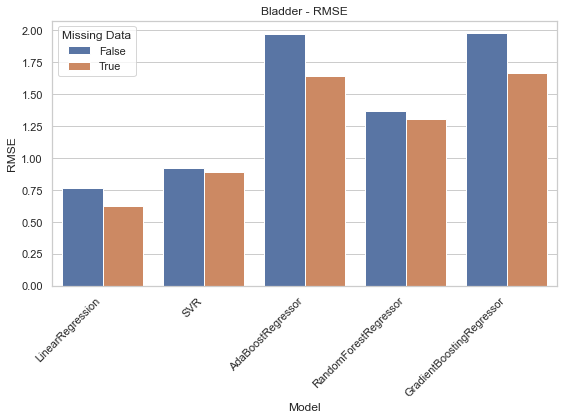

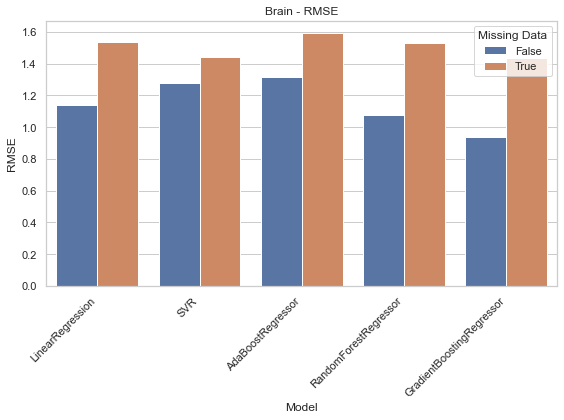

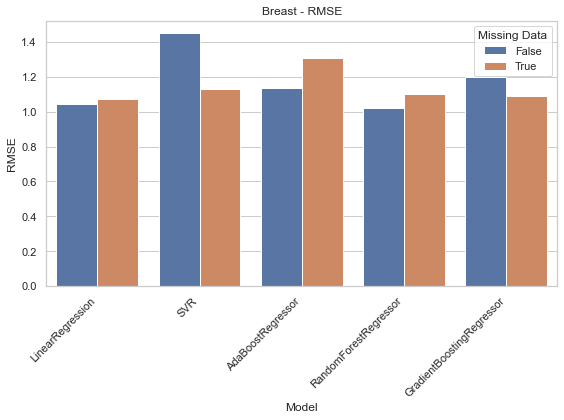

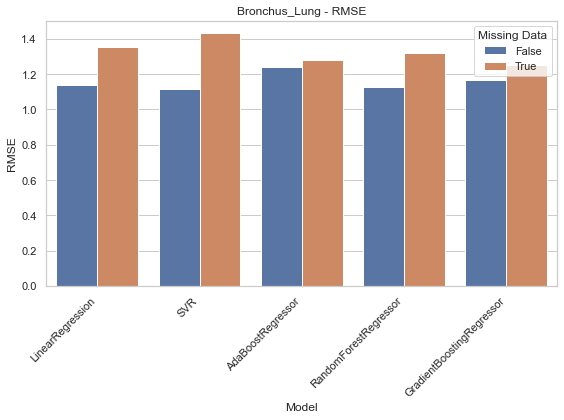

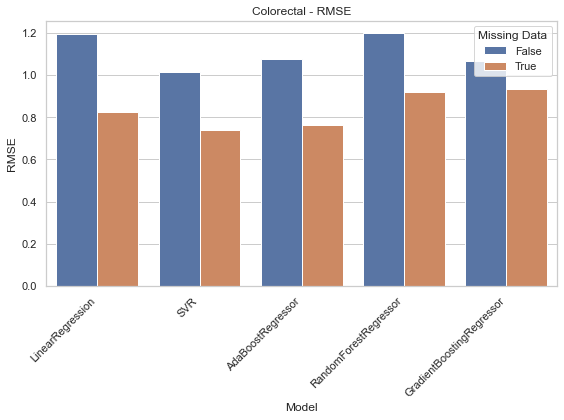

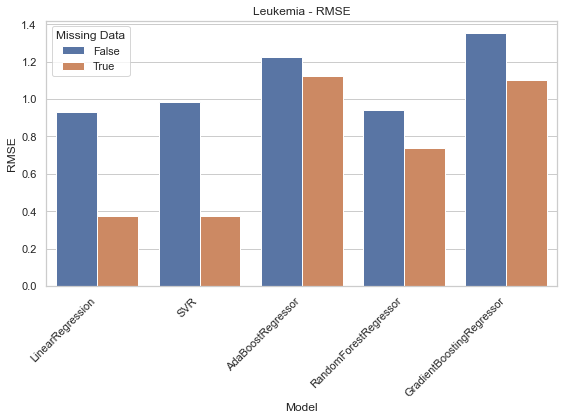

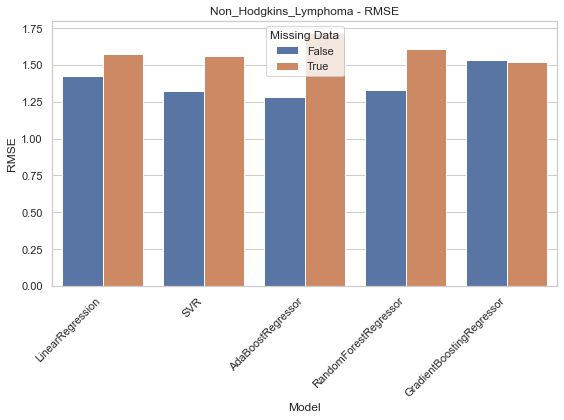

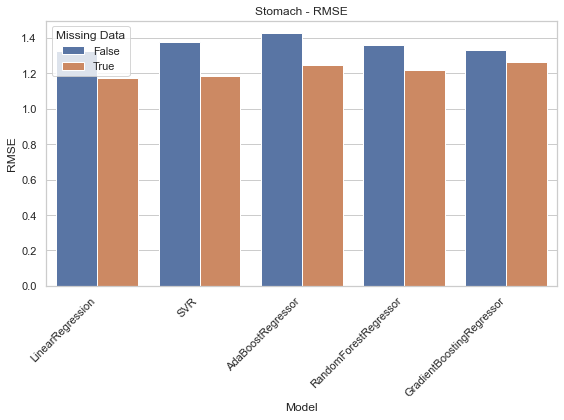

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data_flag=False):
    if missing_data_flag:
        # Introduce 30% random missing data
        missing_percentage = 0.3
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data_with_missing = data.copy()
        data_with_missing[cancer_type].iloc[missing_indices] = np.nan
        target = data_with_missing[cancer_type].values.reshape(-1, 1)
    else:
        target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append({
            'Cancer Type': cancer_type,
            'Missing Data': missing_data_flag,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data_flag=False)
    evaluate_cancer_type(cancer_type, missing_data_flag=True)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(eval_metrics)

# Display the DataFrame
print(df)

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.766227  0.721890   
1      Bladder         False                        SVR  0.926032  0.823642   
2      Bladder         False          AdaBoostRegressor  1.968872  1.672403   
3      Bladder         False      RandomForestRegressor  1.367264  1.173544   
4      Bladder         False  GradientBoostingRegressor  1.976652  1.693167   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.817691  1.602548   
76     Stomach          True                        SVR  1.691467  1.480352   
77     Stomach          True          AdaBoostRegressor  1.962832  1.763092   
78     Stomach          True      RandomForestRegressor  1.817093  1.640724   
79     Stomach          True  GradientBoostingRegressor  1.962824  1.763088   

    R-squared  
0   -1.873281  
1   -3.196768  
2  

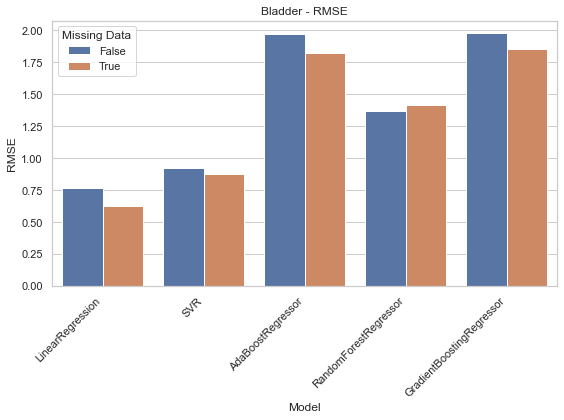

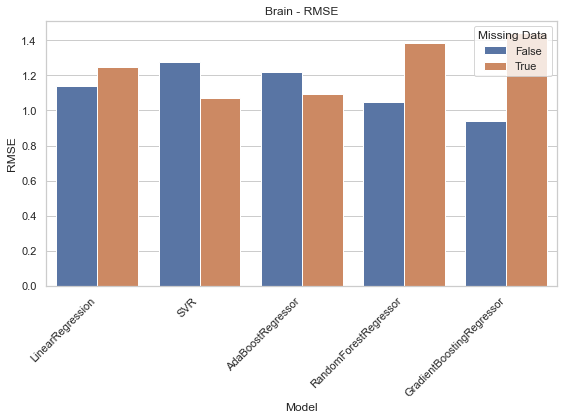

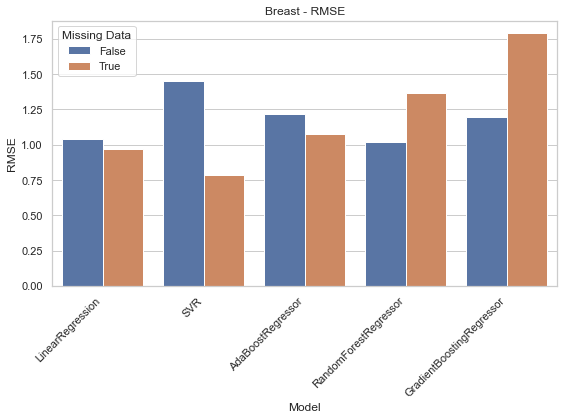

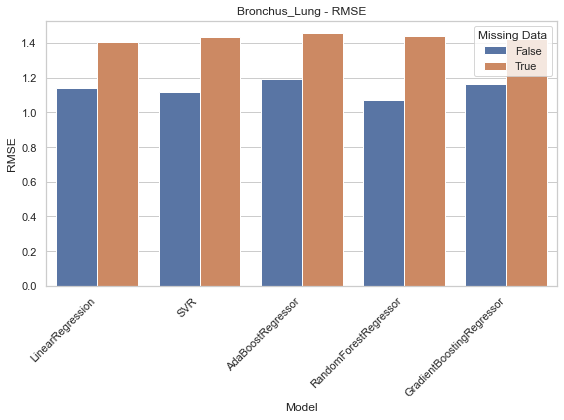

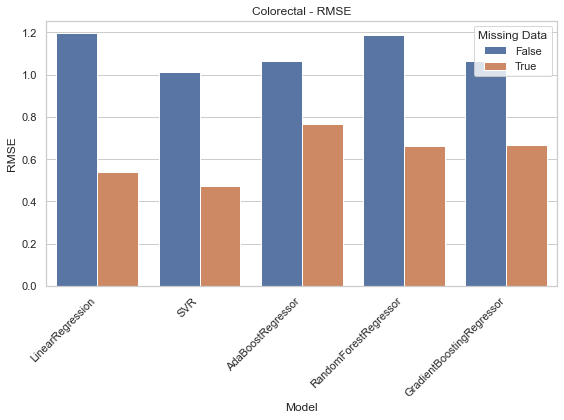

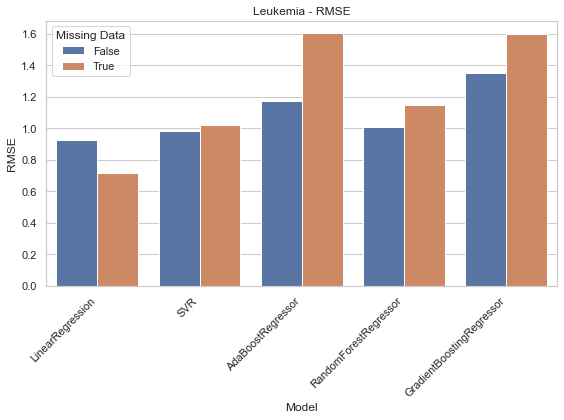

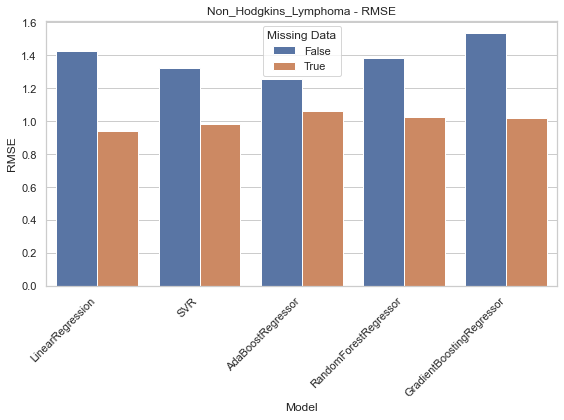

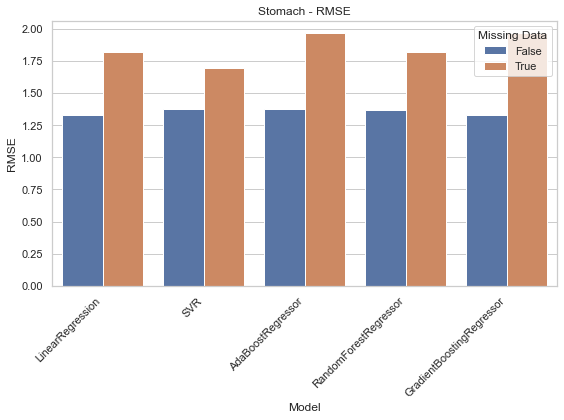

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data_flag=False):
    if missing_data_flag:
        # Introduce 50% random missing data
        missing_percentage = 0.5
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data_with_missing = data.copy()
        data_with_missing[cancer_type].iloc[missing_indices] = np.nan
        target = data_with_missing[cancer_type].values.reshape(-1, 1)
    else:
        target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append({
            'Cancer Type': cancer_type,
            'Missing Data': missing_data_flag,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data_flag=False)
    evaluate_cancer_type(cancer_type, missing_data_flag=True)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(eval_metrics)

# Display the DataFrame
print(df)

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.766227  0.721890   
1      Bladder         False                        SVR  0.926032  0.823642   
2      Bladder         False          AdaBoostRegressor  1.968872  1.672403   
3      Bladder         False      RandomForestRegressor  1.367264  1.173544   
4      Bladder         False  GradientBoostingRegressor  1.976652  1.693167   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.907767  1.538115   
76     Stomach          True                        SVR  1.562733  1.153004   
77     Stomach          True          AdaBoostRegressor  1.930293  1.662091   
78     Stomach          True      RandomForestRegressor  1.771489  1.472643   
79     Stomach          True  GradientBoostingRegressor  1.743472  1.460754   

    R-squared  
0   -1.873281  
1   -3.196768  
2  

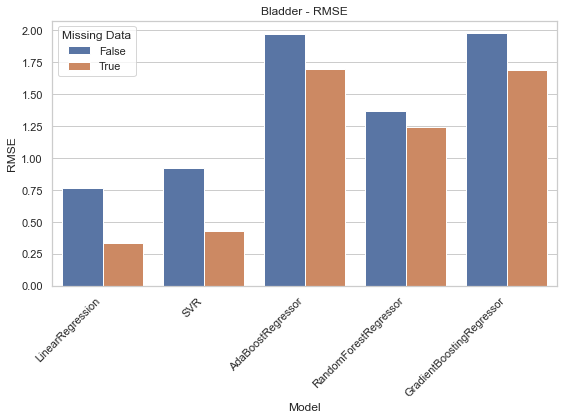

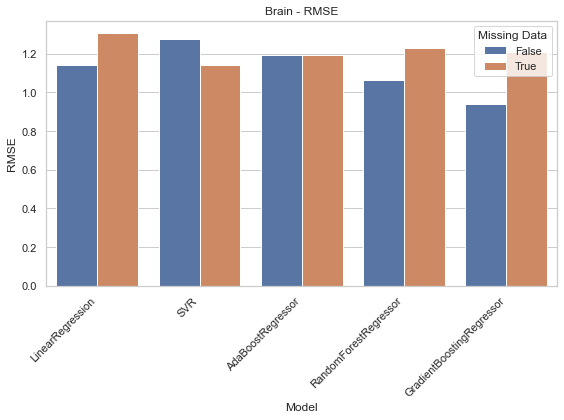

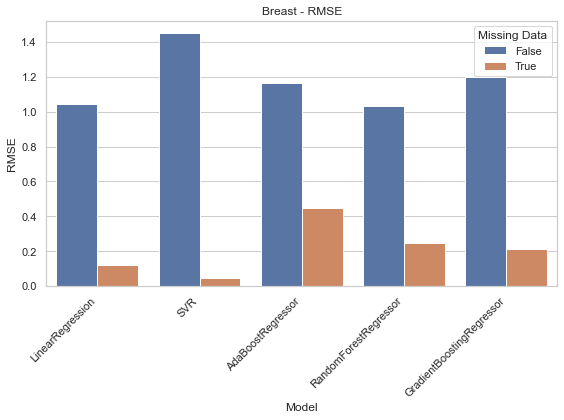

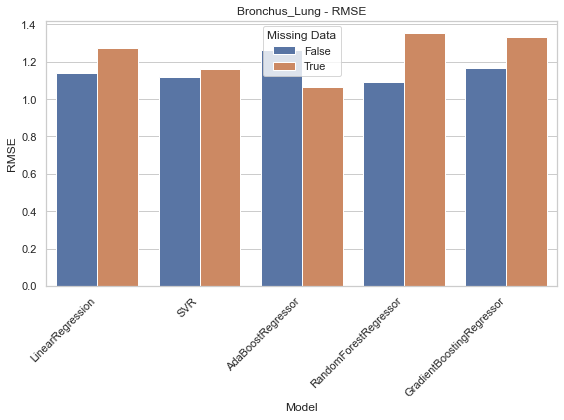

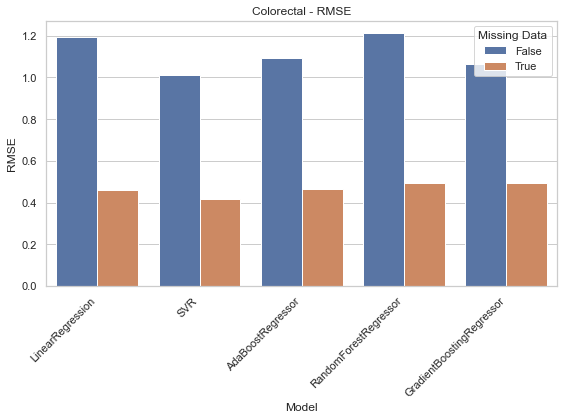

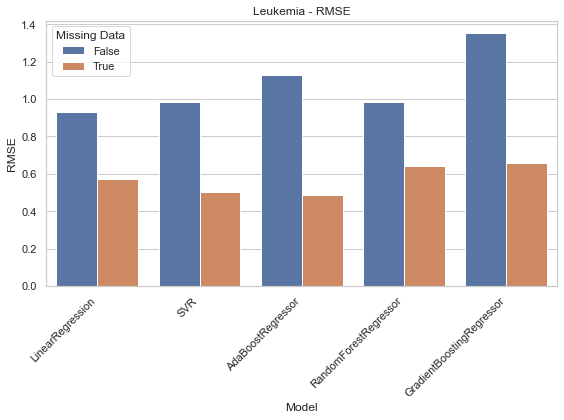

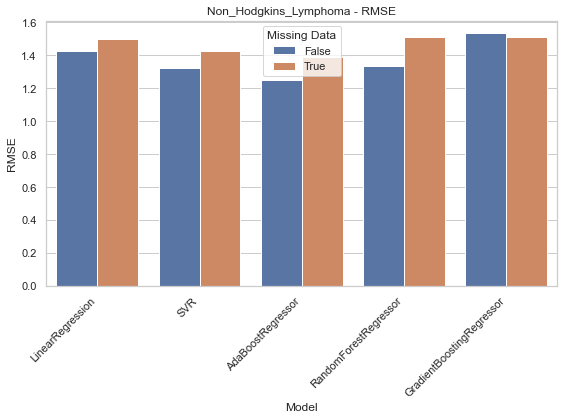

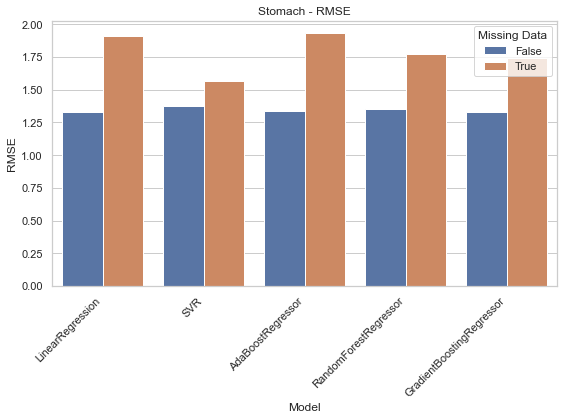

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data_flag=False):
    if missing_data_flag:
        # Introduce 70% random missing data
        missing_percentage = 0.7
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data_with_missing = data.copy()
        data_with_missing[cancer_type].iloc[missing_indices] = np.nan
        target = data_with_missing[cancer_type].values.reshape(-1, 1)
    else:
        target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append({
            'Cancer Type': cancer_type,
            'Missing Data': missing_data_flag,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data_flag=False)
    evaluate_cancer_type(cancer_type, missing_data_flag=True)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(eval_metrics)

# Display the DataFrame
print(df)

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.766227  0.721890   
1      Bladder         False                        SVR  0.926032  0.823642   
2      Bladder         False          AdaBoostRegressor  1.968872  1.672403   
3      Bladder         False      RandomForestRegressor  1.367264  1.173544   
4      Bladder         False  GradientBoostingRegressor  1.976652  1.693167   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  2.067637  1.379209   
76     Stomach          True                        SVR  1.906410  1.027221   
77     Stomach          True          AdaBoostRegressor  2.026731  1.236294   
78     Stomach          True      RandomForestRegressor  2.036746  1.252644   
79     Stomach          True  GradientBoostingRegressor  2.026730  1.236293   

    R-squared  
0   -1.873281  
1   -3.196768  
2  

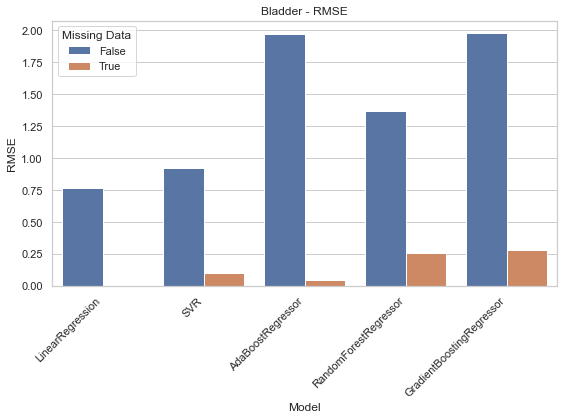

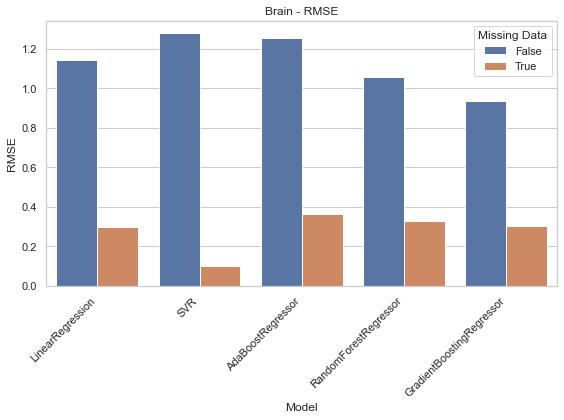

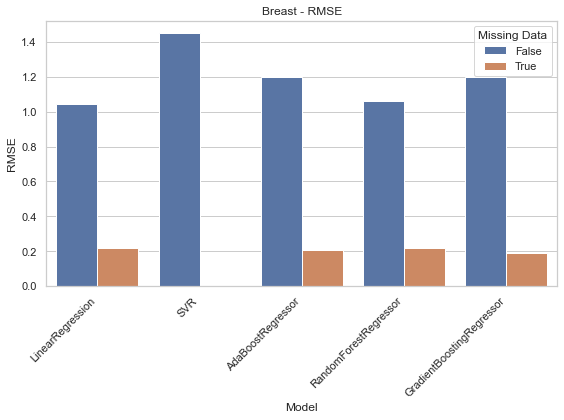

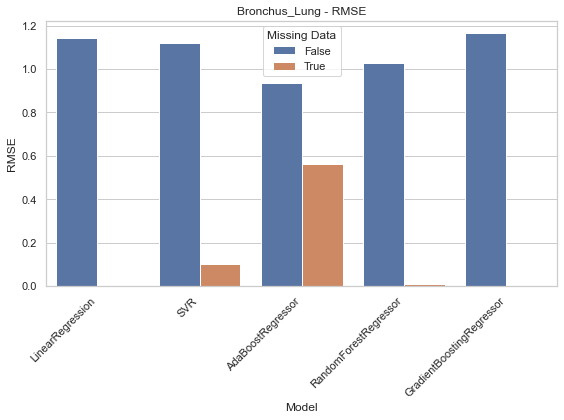

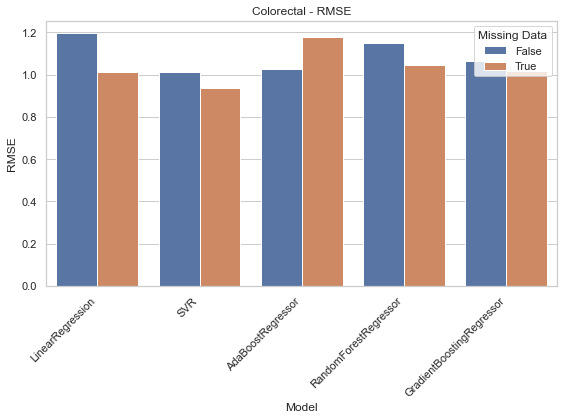

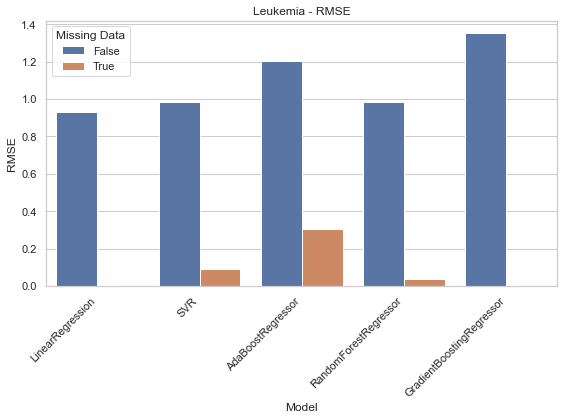

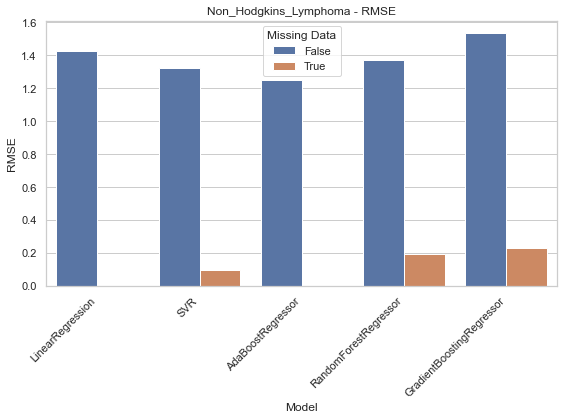

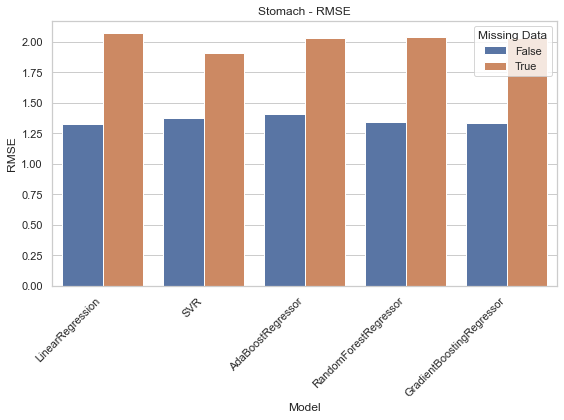

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data_flag=False):
    if missing_data_flag:
        # Introduce 90% random missing data
        missing_percentage = 0.9
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data_with_missing = data.copy()
        data_with_missing[cancer_type].iloc[missing_indices] = np.nan
        target = data_with_missing[cancer_type].values.reshape(-1, 1)
    else:
        target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append({
            'Cancer Type': cancer_type,
            'Missing Data': missing_data_flag,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data_flag=False)
    evaluate_cancer_type(cancer_type, missing_data_flag=True)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(eval_metrics)

# Display the DataFrame
print(df)

# Plot the RMSE for each cancer type with and without missing data
for cancer_type in cancer_columns:
    cancer_df = df[df['Cancer Type'] == cancer_type]

    # Plot RMSE
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x='Model', y='RMSE', hue='Missing Data', data=cancer_df)
    plt.title(f'{cancer_type} - RMSE')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()
